In [2]:
import re
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import calendar

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint as randint
from scipy.stats import uniform as uniform
import lightgbm as lgb
import joblib
from sklearn.ensemble import VotingRegressor
import optuna
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df = pd.read_excel("data1.xlsx")
df.head(20)

,Commodity Name,Date,Units of Measure,Average Price Previous Year,Average Price Previous Month,Current Average price,% monthly change,% yearly change
0,Sugar,2012-11-01 00:00:00,1 Kg,173.4,119,119.73,0.6,-30.9
1,Wheat Flour,2012-11-01 00:00:00,2 Kg,149.91,133.62,134.91,1,-10
2,Cooking Fat,2012-11-01 00:00:00,1 KG,241.15,229.05,229.03,0,-5
3,Sifted Maize Flour,2012-11-01 00:00:00,2 Kg,117.33,113.62,114.52,0.8,-2.4
4,Tomatoes,2012-11-01 00:00:00,1 Kg,69.06,58.52,66.85,14.2,-3.2
5,Rice- Grade 2,2012-11-01 00:00:00,1 Kg,102.28,97.8,98.75,1,-3.5
6,Green Grams,2012-11-01 00:00:00,1 Kg,135.56,116.32,119.67,2.9,-11.7
7,Maize Grain -Loose,2012-11-01 00:00:00,1 Kg,43.17,41.86,41.92,0.1,-2.9
8,Cooking Oil,2012-11-01 00:00:00,1 litre,237.16,231.26,230.87,-0.2,-2.7
9,Electricity,2012-11-01 00:00:00,50 Kw/hr,819,657.5,584.5,-11.1,-28.6


In [4]:
# Number of rows and columns
df.shape

(2488, 8)

In [5]:
# Display column names
df.columns

Index(['Commodity Name', 'Date', 'Units of Measure',
       'Average Price Previous Year', 'Average Price Previous Month',
       'Current Average price', ' % monthly change', '% yearly change'],
      dtype='object')

In [6]:
# Display data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Commodity Name                2488 non-null   object
 1   Date                          2488 non-null   object
 2   Units of Measure              2488 non-null   object
 3   Average Price Previous Year   2488 non-null   object
 4   Average Price Previous Month  2488 non-null   object
 5   Current Average price         2488 non-null   object
 6    % monthly change             2488 non-null   object
 7   % yearly change               2488 non-null   object
dtypes: object(8)
memory usage: 155.6+ KB


In [7]:
# Quick statistical summary (only for numeric columns)
df.describe()

,Commodity Name,Date,Units of Measure,Average Price Previous Year,Average Price Previous Month,Current Average price,% monthly change,% yearly change
count,2488,2488,2488,2488.00,2488.0,2488.0,2488,2488.0
unique,251,144,104,2168.00,2179.0,2183.0,1110,1644.0
top,Electricity,2019-04-01 00:00:00,1 Kg,146.86,534.3,534.3,0,3.1
freq,260,38,1171,6.00,8.0,8.0,80,13.0


In [8]:
df.head()

,Commodity Name,Date,Units of Measure,Average Price Previous Year,Average Price Previous Month,Current Average price,% monthly change,% yearly change
0,Sugar,2012-11-01 00:00:00,1 Kg,173.4,119,119.73,0.6,-30.9
1,Wheat Flour,2012-11-01 00:00:00,2 Kg,149.91,133.62,134.91,1,-10
2,Cooking Fat,2012-11-01 00:00:00,1 KG,241.15,229.05,229.03,0,-5
3,Sifted Maize Flour,2012-11-01 00:00:00,2 Kg,117.33,113.62,114.52,0.8,-2.4
4,Tomatoes,2012-11-01 00:00:00,1 Kg,69.06,58.52,66.85,14.2,-3.2


In [9]:
df.tail()

,Commodity Name,Date,Units of Measure,Average Price Previous Year,Average Price Previous Month,Current Average price,% monthly change,% yearly change
2483,Hou se ren t - sing le room,2025-09-01 00:00:00,1 Per Month,"4 ,115.83","4 ,184 .76","4 ,192.66",0 .2,1.9
2484,Electricity,2025-09-01 00:00:00,200 kWh,"5,714 .88","5,539.54","5,597.16",1,-2.1
2485,Electricity,2025-09-01 00:00:00,50 kWh,"1,275.0 5","1,259.65","1,274 .06",1.1,-0 .1
2486,Pet rol,2025-09-01 00:00:00,1 Litre,189.4 6,186.37,185.59,-0 .4,-2
2487,Diesel,2025-09-01 00:00:00,1 Litre,172.33,172.75,172.64,-0 .1,0 .2


In [10]:
df.sample(5)

,Commodity Name,Date,Units of Measure,Average Price Previous Year,Average Price Previous Month,Current Average price,% monthly change,% yearly change
1002,Spinach,2018-05-01 00:00:00,1 Kg,51.53,65.51,69.12,5.50,34.13
2016,Diesel,2023-09-01 00:00:00,1 Litre,140.91,167.98,180.42,7.4,28
904,Diesel,2017-12-01 00:00:00,1 litre,87.22,92.41,92.44,0.03,5.98
1836,Kerosene/Paraffin,2022-08-01 00:00:00,1 Litre,98.78,128.86,128.86,-,30.5
94,Fresh Packeted Milk,2013-09-01 00:00:00,500 Ml,41.98,47.02,57.43,22.1,36.8


In [11]:
# Count missing values per column
df.isnull().sum()

Commodity Name                  0
Date                            0
Units of Measure                0
Average Price Previous Year     0
Average Price Previous Month    0
Current Average price           0
 % monthly change               0
% yearly change                 0
dtype: int64

In [12]:
# Check for any missing values at all
df.isnull().values.any()

np.False_

In [13]:
# Count duplicate rows
df.duplicated().sum()

np.int64(46)

In [14]:
# Display duplicate rows
df[df.duplicated()]

,Commodity Name,Date,Units of Measure,Average Price Previous Year,Average Price Previous Month,Current Average price,% monthly change,% yearly change
1001,Tomatoes,2018-05-01 00:00:00,1 Kg,99.23,104.26,120.39,15.47,21.33
1002,Spinach,2018-05-01 00:00:00,1 Kg,51.53,65.51,69.12,5.50,34.13
1003,Carrots,2018-05-01 00:00:00,1 Kg,84.11,59.89,62.07,3.65,-26.20
1004,Onions,2018-05-01 00:00:00,1 Kg,133.44,177.01,180.74,2.11,35.45
1005,Potatoes (Irish),2018-05-01 00:00:00,1 Kg,84.95,67.33,68.67,1.99,-19.17
1006,Kale-Sukuma Wiki,2018-05-01 00:00:00,1 Kg,46.61,55.12,56.02,1.63,20.19
1007,Sugar,2018-05-01 00:00:00,1 Kg,168.18,131.22,129.50,-1.31,-23.00
1008,Orange,2018-05-01 00:00:00,1 Kg,97.03,92.99,90.69,-2.48,-6.54
1009,Loose Maize Flour,2018-05-01 00:00:00,1 Kg,67.95,62.74,59.99,-4.38,-11.72
1010,Kerosene,2018-05-01 00:00:00,1 litre,66.26,77.68,79.18,1.93,19.49


In [15]:
#Standardize column names (strip spaces and make lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['commodity_name', 'date', 'units_of_measure',
       'average_price_previous_year', 'average_price_previous_month',
       'current_average_price', '%_monthly_change', '%_yearly_change'],
      dtype='object')

In [16]:
# List of columns to convert
cols_to_convert = ['average_price_previous_year','average_price_previous_month','current_average_price',
                   '%_monthly_change','%_yearly_change']

# Cleaning and converting each column
for col in cols_to_convert:
    df[col] = (df[col]
               .astype(str)                     # ensure string type
               .str.replace(',', '', regex=False)  # remove commas
               .str.replace('%', '', regex=False)  # remove percent signs
               .str.strip())                        # remove spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric safely

# Convert Date column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [17]:
# checking null values --- None is missing. Cleaning done
df.isna().sum()

commodity_name                   0
date                             1
units_of_measure                 0
average_price_previous_year     22
average_price_previous_month    15
current_average_price           12
%_monthly_change                85
%_yearly_change                 27
dtype: int64

In [18]:
# checking the data column
df[df['date'].isna()]

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
1048,Product,NaT,Unit of Measure,NaN,NaN,NaN,NaN,NaN


In [19]:
# it appears to have missing data across all columnns and we will drop this row
df.drop(1048, inplace=True)

In [20]:
# Recompute missing % changes
df['%_monthly_change'] = df['%_monthly_change'].fillna(
    ((df['current_average_price'] - df['average_price_previous_month']) / df['average_price_previous_month']) * 100)

df['%_yearly_change'] = df['%_yearly_change'].fillna(
    ((df['current_average_price'] - df['average_price_previous_year']) / df['average_price_previous_year']) * 100)

# Recompute missing prices (inverse calculation)
df['average_price_previous_month'] = df['average_price_previous_month'].fillna(
    df['current_average_price'] / (1 + (df['%_monthly_change'] / 100)))

df['average_price_previous_year'] = df['average_price_previous_year'].fillna(
    df['current_average_price'] / (1 + (df['%_yearly_change'] / 100)))

# Check remaining nulls
df.isna().sum()

commodity_name                   0
date                             0
units_of_measure                 0
average_price_previous_year     10
average_price_previous_month     8
current_average_price           11
%_monthly_change                 4
%_yearly_change                  6
dtype: int64

In [21]:
df[df['%_yearly_change'].isna()]

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
2461,House rent - single room,2025-08-01,1 Per Month,NaN,NaN,NaN,0.100000,NaN
2462,Gas/LPG,2025-08-01,13 kG,NaN,NaN,NaN,0.400000,NaN
2473,W h eat Flou r-W h it e,2025-09-01,2 Kg,NaN,NaN,NaN,NaN,NaN
2475,On ion -Leeks and Bu lb s,2025-09-01,1 Kg,NaN,108.37,109.37,0.922765,NaN
2476,Tom atoes,2025-09-01,1 Kg,NaN,85.88,86.88,1.200000,NaN
2485,Electricity,2025-09-01,50 kWh,NaN,1259.65,NaN,1.100000,NaN


In [22]:
# dropping the null values
df = df.dropna() 
df 

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
0,Sugar,2012-11-01,1 Kg,173.400000,119.00,119.73,0.600000,-30.900000
1,Wheat Flour,2012-11-01,2 Kg,149.910000,133.62,134.91,1.000000,-10.000000
2,Cooking Fat,2012-11-01,1 KG,241.150000,229.05,229.03,0.000000,-5.000000
3,Sifted Maize Flour,2012-11-01,2 Kg,117.330000,113.62,114.52,0.800000,-2.400000
4,Tomatoes,2012-11-01,1 Kg,69.060000,58.52,66.85,14.200000,-3.200000
...,...,...,...,...,...,...,...,...
2481,Kerosen e/Paraffin,2025-09-01,1 Litre,159.100000,156.76,155.96,-0.510334,-2.000000
2482,Gas/LPG,2025-09-01,13 kG,3196.399594,3158.35,3151.65,-0.212136,-1.400000
2484,Electricity,2025-09-01,200 kWh,5717.221655,5539.54,5597.16,1.000000,-2.100000
2486,Pet rol,2025-09-01,1 Litre,189.377551,186.37,185.59,-0.418522,-2.000000


In [23]:
# validating there are no missing values
df.isna().sum()

commodity_name                  0
date                            0
units_of_measure                0
average_price_previous_year     0
average_price_previous_month    0
current_average_price           0
%_monthly_change                0
%_yearly_change                 0
dtype: int64

In [24]:
# Count + percentage of missing values
missing = df.isna().sum()
missing_percent = (df.isna().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    '% of Total': missing_percent.round(2)
})
missing_summary


,Missing Values,% of Total
commodity_name,0,0.0
date,0,0.0
units_of_measure,0,0.0
average_price_previous_year,0,0.0
average_price_previous_month,0,0.0
current_average_price,0,0.0
%_monthly_change,0,0.0
%_yearly_change,0,0.0


In [25]:
df.columns

Index(['commodity_name', 'date', 'units_of_measure',
       'average_price_previous_year', 'average_price_previous_month',
       'current_average_price', '%_monthly_change', '%_yearly_change'],
      dtype='object')

In [26]:
def remove_extreme_outliers(df, col='current_average_price', threshold=1000):
    """
    Replace values > threshold with linear interpolation.
    No column names, dtypes, or indices are changed.
    """
    out = df.copy()
    mask = out[col] > threshold
    if mask.sum() == 0:
        print("No outliers above threshold.")
        return out

    print(f"{mask.sum()} outlier(s) in '{col}' replaced via linear interpolation.")
    out.loc[mask, col] = np.nan
    out[col] = out[col].interpolate(method='linear', limit_direction='both')
    return out

# ------------------------------------------------------------------
# 1.  Clean ONLY the price column (keep every other column intact)
# ------------------------------------------------------------------
df_clean = remove_extreme_outliers(df, col='current_average_price', threshold=1000) 


386 outlier(s) in 'current_average_price' replaced via linear interpolation.


In [27]:
df_clean

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change
0,Sugar,2012-11-01,1 Kg,173.400000,119.00,119.730000,0.600000,-30.900000
1,Wheat Flour,2012-11-01,2 Kg,149.910000,133.62,134.910000,1.000000,-10.000000
2,Cooking Fat,2012-11-01,1 KG,241.150000,229.05,229.030000,0.000000,-5.000000
3,Sifted Maize Flour,2012-11-01,2 Kg,117.330000,113.62,114.520000,0.800000,-2.400000
4,Tomatoes,2012-11-01,1 Kg,69.060000,58.52,66.850000,14.200000,-3.200000
...,...,...,...,...,...,...,...,...
2481,Kerosen e/Paraffin,2025-09-01,1 Litre,159.100000,156.76,155.960000,-0.510334,-2.000000
2482,Gas/LPG,2025-09-01,13 kG,3196.399594,3158.35,165.836667,-0.212136,-1.400000
2484,Electricity,2025-09-01,200 kWh,5717.221655,5539.54,175.713333,1.000000,-2.100000
2486,Pet rol,2025-09-01,1 Litre,189.377551,186.37,185.590000,-0.418522,-2.000000


# Feature eng

In [28]:
# --- COMPLETE FIXED COMMODITY NAME CLEANING CODE ---

# --- MAPPING FOR EXTREMELY SCATTERED WORDS ---
SCATTERED_MAPPING = {
    # Milk/Dairy
    'freshpacketedcowmilk': 'Milk - Fresh Packeted',
    'packettedfreshmilk': 'Milk - Fresh Packeted',
    'freshpocketedcowmilk': 'Milk - Fresh Packeted',
    'freshpacketedmilk': 'Milk - Fresh Packeted',
    
    # Flours
    'wheatflourwhite': 'Wheat Flour - White',
    'wheatflourbrown': 'Wheat Flour - Brown',
    'maizefloursifted': 'Maize Flour - Sifted/Fortified',
    'maizeflourloose': 'Maize Flour - Loose',
    'wheateatflourwhite': 'Wheat Flour - White',
    'wheatflour': 'Wheat Flour - General',

    # Produce
    'onionleeksandbulbs': 'Onion Leeks and Bulbs',
    'onionleeksandbulb': 'Onion Leeks and Bulbs',
    'tomatoes': 'Tomatoes',
    'potatoesirish': 'Potatoes (Irish)',
    'cabbages': 'Cabbages',
    'mangoes': 'Mangoes',
    'oranges': 'Oranges',
    'tomatotes': 'Tomatoes',
    'cabbagges': 'Cabbages',
    
    # Fuel/Oil
    'petrol': 'Petrol',
    'cookingoilsalad': 'Cooking Oil/Fat',
    'keroseneparaffin': 'Kerosene/Paraffin',
    
    # Rent
    'houserentsingleroom': 'House Rent - 1 Bedroom/Single Room',
    'houserent1bedroom': 'House Rent - 1 Bedroom/Single Room',
    'rentsingleroom': 'House Rent - Single Room',
    'housesingleroom': 'House Rent - Single Room',
    
    # Specific problematic entries we found
    'nonaromaticunbrokenwh': 'Rice - Non Aromatic',
    'beefwithbones': 'Beef - With Bones',
    'beefw ithbones': 'Beef - With Bones',
    'aromaticunbrokenricepishoribasmatietc': 'Rice - Aromatic',
    'keroseneparaffin': 'Kerosene/Paraffin',
}


# --- ENHANCED CLEANING FUNCTION ---
def clean_commodity_name(name):
    """
    Standardizes commodity names by removing noise, inconsistent spacing, 
    and using a lookup table for heavily scattered/typo'd names.
    """
    if pd.isna(name) or name is None:
        return name

    original_name = str(name)

    # 1. Convert to string and Lowercase for case insensitivity
    name = original_name.lower()

    # 2. Remove Line Breaks (\n), Tabs (\t), and carriage returns (\r)
    name = name.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')

    # 3. Clean up specific punctuation and standardizations
    name = re.sub(r'[\(\)-/]', ' ', name) # Replace '(', ')', '-', '/' with space
    name = name.replace('kgs', ' kg') # Standardize unit text if needed

    # 4. Collapse multiple spaces into a single space and strip leading/trailing spaces
    name_cleaned_spaces = re.sub(r'\s+', ' ', name).strip()
    
    # --- 5. AGGRESSIVE TYPO/SCATTERING CORRECTION ---
    # Temporarily remove ALL spaces to check against the SCATTERED_MAPPING
    name_no_spaces = name_cleaned_spaces.replace(' ', '')

    # Check the mapping for the aggressively cleaned string
    if name_no_spaces in SCATTERED_MAPPING:
        return SCATTERED_MAPPING[name_no_spaces]
    
    # --- 6. SPECIFIC FIXES FOR THE PROBLEMATIC ENTRIES WE FOUND ---
    # Fix "Non Aromatic Unbroken W H" -> "Rice - Non Aromatic"
    if 'non aromatic unbroken w h' in name_cleaned_spaces:
        return 'Rice - Non Aromatic'
    
    # Fix "Beef W It H Bones" -> "Beef - With Bones" 
    if 'beef w it h bones' in name_cleaned_spaces:
        return 'Beef - With Bones'
    
    # Fix "Aromatic Unbroken Rice Pishori Basmati E T C" -> "Rice - Aromatic"
    if 'aromatic unbroken rice pishori basmati e t c' in name_cleaned_spaces:
        return 'Rice - Aromatic'
    
    # Fix "Kerosen E Paraffin" -> "Kerosene/Paraffin"
    if 'kerosen e paraffin' in name_cleaned_spaces:
        return 'Kerosene/Paraffin'
    
    # From here on, we use the name with normalized spacing
    name = name_cleaned_spaces

    # --- 7. FIX SCATTERED LETTER PATTERNS ---
    # Fix single scattered letters (like ' w ', ' h ', etc.)
    name = re.sub(r'\s[w]\s', 'w', name)  # Fix ' w ' -> 'w'
    name = re.sub(r'\s[h]\s', 'h', name)  # Fix ' h ' -> 'h' 
    name = re.sub(r'\s[e]\s', 'e', name)  # Fix ' e ' -> 'e'
    name = re.sub(r'\s[t]\s', 't', name)  # Fix ' t ' -> 't'
    name = re.sub(r'\s[a]\s', 'a', name)  # Fix ' a ' -> 'a'
    name = re.sub(r'\s[c]\s', 'c', name)  # Fix ' c ' -> 'c'
    
    # Fix specific known scattered patterns
    name = name.replace('w h eat', 'wheat')
    name = name.replace('w h ite', 'white')
    name = name.replace('w h', 'wh')
    name = name.replace('t o', 'to')
    name = name.replace('a t', 'at')
    name = name.replace('e t c', 'etc')
    name = name.replace('e t', 'et')
    name = name.replace('i t h', 'ith')
    name = name.replace('w i t h', 'with')
    
    name = name.title()  # Title case for consistency

    # --- 8. Numerical Standardization and Rent Mapping ---
    
    # Unify numerical/text representations for house sizes
    name = re.sub(r'\bone\b|\b1\s*bed\w*|\bsingle\s*room|\bbedsitter\b', '1-bedroom', name)
    name = re.sub(r'\btwo\b|\b2\s*bed\w*|\bdouble\s*room\b', '2-bedroom', name)
    name = re.sub(r'\bthree\b|\b3\s*bed\w*', '3-bedroom', name)
    
    # Standardize 'Grade' spacing (e.g., Rice Grade-2)
    name = name.replace(' grade ', ' grade-')
    
    # Standardize House Rent terms
    if 'house rent' in name.lower() or name.lower() == 'rent':
        name_lower = name.lower()
        if '1-bedroom' in name_lower or 'single room' in name_lower:
            return 'House Rent - 1 Bedroom/Single Room'
        if '2-bedroom' in name_lower or 'double room' in name_lower:
            return 'House Rent - 2 Bedroom'
        if '3-bedroom' in name_lower:
            return 'House Rent - 3 Bedroom'
        if 'maisonette' in name_lower:
            return 'House Rent - Maisonette'
        if 'flat' in name_lower:
            return 'House Rent - Flat'
        return 'House Rent - General'

    # --- 9. Custom Replacements (Remaining Category Mapping) ---
    name_lower = name.lower()
    
    # Rice standardization
    if 'rice' in name_lower or 'aromatic' in name_lower or 'basmati' in name_lower:
        if 'non aromatic' in name_lower:
            return 'Rice - Non Aromatic'
        elif 'aromatic' in name_lower:
            return 'Rice - Aromatic'
        elif 'grade' in name_lower:
            return 'Rice - Grade 2' if '2' in name_lower else 'Rice - Grade 1'
        else:
            return 'Rice - General'
    
    # Meat standardization
    if 'beef' in name_lower:
        if 'with bone' in name_lower or 'w ith bone' in name_lower:
            return 'Beef - With Bones'
        else:
            return 'Beef - General'
    
    # Milk standardization
    if 'milk' in name_lower:
        if ('fresh' in name_lower or 'packed' in name_lower) and ('packeted' in name_lower or 'packetted' in name_lower or 'cow' in name_lower):
            return 'Milk - Fresh Packeted'
        if 'fresh' in name_lower and 'unpacketed' in name_lower:
            return 'Milk - Fresh Unpackaged'
        if 'mala' in name_lower or 'sour' in name_lower:
            return 'Milk - Sour (Mala)'
        if 'goat' in name_lower:
            return 'Milk - Goat'
        return 'Milk - General'

    # Flour standardization
    if 'maize flour' in name_lower:
        if 'sifted' in name_lower or 'fortified' in name_lower:
            return 'Maize Flour - Sifted/Fortified'
        return 'Maize Flour - Loose'

    if 'wheat flour' in name_lower:
        if 'white' in name_lower:
            return 'Wheat Flour - White'
        if 'brown' in name_lower:
            return 'Wheat Flour - Brown'
        return 'Wheat Flour - General'

    # Common vegetable standardizations
    if 'sukuma' in name_lower or 'kale' in name_lower:
        return 'Kale (Sukuma Wiki)'
    if 'irish potatoes' in name_lower or name_lower.startswith('potatoes'):
        return 'Potatoes (Irish)'
    
    # Other standardizations
    if 'mobile phone' in name_lower or 'cell phone' in name_lower or 'airtime' in name_lower:
        return 'Mobile Phone Airtime'
    if 'cooking oil' in name_lower or 'cooking fat' in name_lower or 'salad' in name_lower:
        return 'Cooking Oil/Fat'
    if 'water services' in name_lower or 'water vendor' in name_lower:
        return 'Water Services'
    if 'kerosene' in name_lower or 'paraffin' in name_lower:
        return 'Kerosene/Paraffin'
    if 'gas' in name_lower and 'lpg' in name_lower:
        return 'Gas (LPG)'

    # Default: Return the cleaned name
    return name

# --- APPLY CLEANING TO MAIN DATAFRAME ---
print("=== APPLYING COMMODITY NAME CLEANING ===")
print(f"Before cleaning - Unique commodity names: {len(df_clean['commodity_name'].unique())}")

# Apply cleaning to the ORIGINAL column (replace it)
df_clean['commodity_name'] = df_clean['commodity_name'].apply(clean_commodity_name)

print(f"After cleaning - Unique commodity names: {len(df_clean['commodity_name'].unique())}")

# Remove temporary column if it exists
if 'commodity_name_clean' in df_clean.columns:
    df_clean.drop('commodity_name_clean', axis=1, inplace=True)
    print("Removed temporary 'commodity_name_clean' column")

# --- VERIFICATION ---
print("\n=== VERIFICATION ===")

# Show specific fixes for the problematic entries we found
print("Specific problematic entries fixed:")
problematic_entries = [
    'Non Aromatic Unbroken W H',
    'Beef W It H Bones',
    'Aromatic Unbroken Rice Pishori Basmati E T C', 
    'Kerosen E Paraffin'
]

for entry in problematic_entries:
    cleaned = clean_commodity_name(entry)
    print(f"  '{entry}' -> '{cleaned}'")

# Check for remaining scattered words
print("\nChecking for remaining scattered words:")
scattered_keywords = [' w ', ' h ', ' a ', ' e ', ' t ']
all_clean = True

for keyword in scattered_keywords:
    count = df_clean['commodity_name'].str.contains(keyword, case=False, na=False).sum()
    if count > 0:
        print(f"❌ Found {count} entries with pattern '{keyword}'")
        all_clean = False
        # Show the problematic entries
        problematic = df_clean[df_clean['commodity_name'].str.contains(keyword, case=False, na=False)]['commodity_name'].unique()
        for name in problematic:
            print(f"    - '{name}'")
    else:
        print(f"✅ No entries with pattern '{keyword}'")

if all_clean:
    print("\n🎉 SUCCESS: All commodity names have been cleaned!")
    print("✅ No scattered words remain!")
else:
    print("\n⚠️  Some scattered words remain")

# Final summary
print(f"\n=== FINAL SUMMARY ===")
print(f"DataFrame shape: {df_clean.shape}")
print(f"Unique commodities: {df_clean['commodity_name'].nunique()}")
print(f"Reduction from original: {243 - df_clean['commodity_name'].nunique()} names ({(1 - df_clean['commodity_name'].nunique()/243)*100:.1f}% reduction)")

print("\n--- Top 10 Commodities After Cleaning ---")
print(df_clean['commodity_name'].value_counts().head(10))

print("\n✅ Commodity name cleaning completed successfully!") 

=== APPLYING COMMODITY NAME CLEANING ===
Before cleaning - Unique commodity names: 243
After cleaning - Unique commodity names: 118

=== VERIFICATION ===
Specific problematic entries fixed:
  'Non Aromatic Unbroken W H' -> 'Rice - Non Aromatic'
  'Beef W It H Bones' -> 'Beef - With Bones'
  'Aromatic Unbroken Rice Pishori Basmati E T C' -> 'Rice - Aromatic'
  'Kerosen E Paraffin' -> 'Kerosene/Paraffin'

Checking for remaining scattered words:
✅ No entries with pattern ' w '
✅ No entries with pattern ' h '
✅ No entries with pattern ' a '
✅ No entries with pattern ' e '
✅ No entries with pattern ' t '

🎉 SUCCESS: All commodity names have been cleaned!
✅ No scattered words remain!

=== FINAL SUMMARY ===
DataFrame shape: (2473, 8)
Unique commodities: 118
Reduction from original: 125 names (51.4% reduction)

--- Top 10 Commodities After Cleaning ---
commodity_name
Electricity                       258
Petrol                            141
Kerosene/Paraffin                 137
Diesel        

In [29]:

# --- MAPPING FOR EXTREMELY SCATTERED WORDS ---
# Key is the lowercased, space-free version of the messy name.
# Value is the desired, standardized commodity name.
SCATTERED_MAPPING = {
    # Milk/Dairy
    'freshpacketedcowmilk': 'Milk - Fresh Packeted',
    
    # Flours
    'wheatflourwhite': 'Wheat Flour - White',
    'wheatflourbrown': 'Wheat Flour - Brown',
    'maizefloursifted': 'Maize Flour - Sifted/Fortified',
    'maizeflourloose': 'Maize Flour - Loose',

    # Produce
    'onionleeksandbulbs': 'Onion Leeks and Bulbs',
    'onionleeksandbulb': 'Onion Leeks and Bulbs',
    'tomatoes': 'Tomatoes',
    'potatoesirish': 'Potatoes (Irish)',
    'cabbages': 'Cabbages',
    'mangoes': 'Mangoes',
    'oranges': 'Oranges',
    
    # Fuel/Oil
    'petrol': 'Petrol',
    'cookingoilsalad': 'Cooking Oil/Fat',
    
    # Rent 
    'housereatsingleroom': 'House Rent - 1 Bedroom/Single Room',
    'houserent1bedroom': 'House Rent - 1 Bedroom/Single Room',
}


# --- The Core Cleaning Function (Identical to previous version) ---
def clean_commodity_name(name):
    """
    Standardizes a commodity name by removing noise, inconsistent spacing, 
    and using a lookup table for heavily scattered/typo'd names.
    """
    if pd.isna(name) or name is None:
        return name

    # 1. Convert to string and Lowercase for case insensitivity
    name = str(name).lower()

    # 2. Remove Line Breaks, Tabs, and carriage returns
    name = name.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')

    # 3. Clean up specific punctuation and standardizations
    name = re.sub(r'[\(\)-/]', ' ', name)
    name = name.replace('kgs', ' kg')

    # 4. Collapse multiple spaces into a single space and strip leading/trailing spaces
    name_cleaned_spaces = re.sub(r'\s+', ' ', name).strip()
    
    # --- 5. AGGRESSIVE TYPO/SCATTERING CORRECTION ---
    name_no_spaces = name_cleaned_spaces.replace(' ', '')

    if name_no_spaces in SCATTERED_MAPPING:
        return SCATTERED_MAPPING[name_no_spaces]
    
    name = name_cleaned_spaces


    # --- 6. Numerical Standardization and Rent Mapping ---
    name = re.sub(r'\bone\b|\b1\s*bed\w*|\bsingle\s*room|\bbedsitter\b', '1-bedroom', name)
    name = re.sub(r'\btwo\b|\b2\s*bed\w*|\bdouble\s*room\b', '2-bedroom', name)
    name = re.sub(r'\bthree\b|\b3\s*bed\w*', '3-bedroom', name)
    name = name.replace(' grade ', ' grade-')
    
    if 'house rent' in name or name == 'rent' or 'maisonette' in name or 'flat' in name:
        if '1-bedroom' in name or 'single room' in name:
            return 'House Rent - 1 Bedroom/Single Room'
        if '2-bedroom' in name or 'double room' in name:
            return 'House Rent - 2 Bedroom'
        if '3-bedroom' in name:
            return 'House Rent - 3 Bedroom'
        return 'House Rent - General'

    # --- 7. Custom Replacements (Remaining Category Mapping) ---
    if 'milk' in name:
        if ('fresh' in name or 'packed' in name) and ('packeted' in name or 'packetted' in name or 'cow' in name):
            return 'Milk - Fresh Packeted'
        # ... (rest of the milk logic)
        return 'Milk - General' 

    # (Other category logic condensed for space, but it remains the same)
    if 'maize flour' in name: return 'Maize Flour - Sifted/Fortified' if 'sifted' in name or 'fortified' in name else 'Maize Flour - Loose'
    if 'wheat flour' in name: return 'Wheat Flour - White' if 'white' in name else 'Wheat Flour - Brown' if 'brown' in name else 'Wheat Flour - General'
    if 'sukuma' in name or 'kale' in name: return 'Kale (Sukuma Wiki)'
    if 'irish potatoes' in name or name.startswith('potatoes'): return 'Potatoes (Irish)'
    if 'mobile phone' in name or 'cell phone' in name or 'airtime' in name: return 'Mobile Phone Airtime'
    if 'cooking oil' in name or 'cooking fat' in name or 'salad' in name: return 'Cooking Oil/Fat'
    if 'water services' in name or 'water vendor' in name: return 'Water Services'
    if 'detergent' in name or 'soap' in name: return 'Laundry Soap / Detergents'


    # Default: Title Case the final clean name for presentation consistency
    return name.title()

In [30]:
# 2. Assign the results to a NEW column, 'commodity_name_clean'.
# --- FIXED COMMODITY NAME CLEANING ---

# 1. Apply the cleaning function to the ORIGINAL column (replace it)
print("Before cleaning - Unique commodity names:", len(df_clean['commodity_name'].unique()))
df_clean['commodity_name'] = df_clean['commodity_name'].apply(clean_commodity_name)
print("After cleaning - Unique commodity names:", len(df_clean['commodity_name'].unique()))

# 2. Remove the temporary column if it exists (clean up)
if 'commodity_name_clean' in df_clean.columns:
    df_clean.drop('commodity_name_clean', axis=1, inplace=True)
    print("Removed temporary 'commodity_name_clean' column")

# 3. Verify the cleaning worked
print("\n--- Top 20 Commodities After Cleaning ---")
print(df_clean['commodity_name'].value_counts().head(20))

# 4. Show some examples of cleaned names
print("\n--- Cleaning Examples ---")
sample_before_after = [
    'W h eat Flou r-W h it e', 
    'Fresh P Acket Ed Cow M Ilk',
    'Hou se ren t - sing le room',
    'Pet rol'
]

for name in sample_before_after:
    cleaned = clean_commodity_name(name)
    print(f"'{name}' -> '{cleaned}'")

Before cleaning - Unique commodity names: 118
After cleaning - Unique commodity names: 111

--- Top 20 Commodities After Cleaning ---
commodity_name
Electricity                       258
Petrol                            141
Kerosene Paraffin                 137
Diesel                            136
Potatoes (Irish)                  119
Kale (Sukuma Wiki)                112
Tomatoes                          109
Maize Flour - Sifted/Fortified    100
Gas Lpg                            99
Cabbages                           96
Sugar                              95
Maize Grain Loose                  71
Beef With Bones                    70
Milk - Fresh Packeted              69
Carrots                            64
House Rent - General               61
Spinach                            57
Beans                              53
Mangoes                            45
Charcoal                           44
Name: count, dtype: int64

--- Cleaning Examples ---
'W h eat Flou r-W h it e' -> 'Wheat Fl

After cleaning - Unique commodity names: 111

--- Top 20 Commodities After Cleaning ---
commodity_name
Electricity                       258
Petrol                            141
Kerosene Paraffin                 137
Diesel                            136
Potatoes (Irish)                  119
Kale (Sukuma Wiki)                112
Tomatoes                          109
Maize Flour - Sifted/Fortified    100
Gas Lpg                            99
Cabbages                           96
Sugar                              95
Maize Grain Loose                  71
Beef With Bones                    70
Milk - Fresh Packeted              69
Carrots                            64
House Rent - General               61
Spinach                            57
Beans                              53
Mangoes                            45
Charcoal                           44
Name: count, dtype: int64

--- Cleaning Examples ---
'W h eat Flou r-W h it e' -> 'Wheat Flour - White'
'Fresh P Acket Ed Cow M Ilk' -> '

In [31]:
# --- ENHANCED CLEANING FUNCTION ---
def clean_commodity_name(name):
    """
    Standardizes commodity names by removing noise, fixing typos, and categorizing.
    """
    if pd.isna(name) or name is None:
        return name

    original_name = str(name)
    
    # 1. Basic cleaning
    name = original_name.lower()
    name = name.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')  # Remove line breaks
    name = re.sub(r'[\(\)\-/]', ' ', name)  # Replace punctuation with spaces
    name = name.replace('kgs', ' kg').replace('kw/hr', ' kwh')  # Standardize units
    
    # 2. Remove multiple spaces and strip
    name = re.sub(r'\s+', ' ', name).strip()
    
    # 3. Aggressive typo correction (remove spaces to catch scattered words)
    name_no_spaces = name.replace(' ', '')
    
    # Expanded mapping for scattered words
    SCATTERED_MAPPING = {
        # Milk/Dairy
        'freshpacketedcowmilk': 'Milk - Fresh Packeted',
        'packettedfreshmilk': 'Milk - Fresh Packeted',
        'freshpacketedmilk': 'Milk - Fresh Packeted',
        
        # Flours
        'wheatflourwhite': 'Wheat Flour - White',
        'wheatflourbrown': 'Wheat Flour - Brown', 
        'maizefloursifted': 'Maize Flour - Sifted',
        'maizeflourloose': 'Maize Flour - Loose',
        'wheatflour': 'Wheat Flour - General',

        # Produce
        'onionleeksandbulbs': 'Onion Leeks and Bulbs',
        'onionleeksandbulb': 'Onion Leeks and Bulbs',
        'tomatoes': 'Tomatoes',
        'potatoesirish': 'Potatoes (Irish)',
        'cabbages': 'Cabbages',
        'mangoes': 'Mangoes',
        'oranges': 'Oranges',
        
        # Fuel/Oil
        'petrol': 'Petrol',
        'cookingoilsalad': 'Cooking Oil/Fat',
        'keroseneparaffin': 'Kerosene/Paraffin',
        
        # Rent
        'houserentsingleroom': 'House Rent - Single Room',
        'houserent1bedroom': 'House Rent - 1 Bedroom',
        'rentsingleroom': 'House Rent - Single Room',
    }
    
    if name_no_spaces in SCATTERED_MAPPING:
        return SCATTERED_MAPPING[name_no_spaces]
    
    name = name.title()  # Title case for consistency
    
    # 4. Standardize rent terms
    if 'rent' in name.lower() or 'maisonette' in name.lower() or 'flat' in name.lower():
        name_lower = name.lower()
        if 'single' in name_lower or '1' in name_lower or 'bedSitter' in name_lower:
            return 'House Rent - Single Room'
        elif 'double' in name_lower or '2' in name_lower:
            return 'House Rent - 2 Bedroom' 
        elif '3' in name_lower:
            return 'House Rent - 3 Bedroom'
        elif 'maisonette' in name_lower:
            return 'House Rent - Maisonette'
        elif 'flat' in name_lower:
            return 'House Rent - Flat'
        else:
            return 'House Rent - General'
    
    # 5. Standardize other categories
    name_lower = name.lower()
    
    if 'milk' in name_lower:
        if 'fresh' in name_lower and ('packet' in name_lower or 'cow' in name_lower):
            return 'Milk - Fresh Packeted'
        elif 'fresh' in name_lower and 'unpack' in name_lower:
            return 'Milk - Fresh Unpackaged'
        elif 'sour' in name_lower or 'mala' in name_lower:
            return 'Milk - Sour (Mala)'
        elif 'goat' in name_lower:
            return 'Milk - Goat'
        else:
            return 'Milk - General'
    
    # Maize flour standardization
    if 'maize flour' in name_lower:
        if 'sifted' in name_lower or 'fortified' in name_lower:
            return 'Maize Flour - Sifted'
        else:
            return 'Maize Flour - Loose'
    
    # Wheat flour standardization  
    if 'wheat flour' in name_lower:
        if 'white' in name_lower:
            return 'Wheat Flour - White'
        elif 'brown' in name_lower:
            return 'Wheat Flour - Brown'
        else:
            return 'Wheat Flour - General'
    
    # Common vegetable standardizations
    if 'sukuma' in name_lower or 'kale' in name_lower:
        return 'Kale (Sukuma Wiki)'
    if 'irish potato' in name_lower:
        return 'Potatoes (Irish)'
    
    # Other standardizations
    if 'mobile' in name_lower or 'airtime' in name_lower or 'cell phone' in name_lower:
        return 'Mobile Phone Airtime'
    if 'cooking oil' in name_lower or 'cooking fat' in name_lower:
        return 'Cooking Oil/Fat'
    if 'water' in name_lower and ('service' in name_lower or 'vendor' in name_lower):
        return 'Water Services'
    if 'kerosene' in name_lower:
        return 'Kerosene/Paraffin'
    if 'gas' in name_lower and 'lpg' in name_lower:
        return 'Gas (LPG)'
    return name

In [32]:
# Find the specific problematic entries
print("=== PROBLEMATIC ENTRIES ===")
scattered_patterns = [' w ', ' h ', ' e ', ' t ']

for pattern in scattered_patterns:
    problematic = df[df['commodity_name'].str.contains(pattern, case=False, na=False)]
    if len(problematic) > 0:
        print(f"\nPattern '{pattern}':")
        for name in problematic['commodity_name'].unique():
            print(f"  - '{name}'")

=== PROBLEMATIC ENTRIES ===

Pattern ' w ':
  - 'Non Aromatic (Unbroken) W h'
  - 'Kale-Sukum a W iki'
  - 'Beef - W it h Bones'

Pattern ' h ':
  - 'Beef - W it h Bones'


In [33]:
df_grouped = (df_clean
    .groupby(['commodity_name', 'units_of_measure', pd.Grouper(key='date', freq='M')])
    .agg(current_avg_price=('current_average_price', 'mean'),
         n_quotes=('current_average_price', 'count'),
         std_price=('current_average_price', 'std'),
         min_price=('current_average_price', 'min'),
         max_price=('current_average_price', 'max'))
    .reset_index())

C:\Users\user\AppData\Local\Temp\ipykernel_23756\692322981.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(['commodity_name', 'units_of_measure', pd.Grouper(key='date', freq='M')])


### The above code block slightly enriches the data so that we do not throw away the intra-month information that policy analysts (and your models) may need later.
### ✅ Why keep the monthly aggregation
### Prophet / SARIMA require regular monthly stamps
### Daily quotations are too noisy for long-horizon forecasts
### 2500 → ~300 rows speeds up grid-searches dramatically

In [34]:
df_clean['commodity_name'].value_counts().head(20)

commodity_name
Electricity                       258
Petrol                            141
Kerosene Paraffin                 137
Diesel                            136
Potatoes (Irish)                  119
Kale (Sukuma Wiki)                112
Tomatoes                          109
Maize Flour - Sifted/Fortified    100
Gas Lpg                            99
Cabbages                           96
Sugar                              95
Maize Grain Loose                  71
Beef With Bones                    70
Milk - Fresh Packeted              69
Carrots                            64
House Rent - General               61
Spinach                            57
Beans                              53
Mangoes                            45
Charcoal                           44
Name: count, dtype: int64

In [35]:
# weights for the 20 most tracked products
raw_weights = {'Electricity': 1.2656,
           'Petrol': 1.2003,
           'Diesel': 0.12,
           'Tomatoes': 1.3058,
           'Potatoes (Irish)': 0.7482,
           'Kale-Sukuma Wiki': 0.5742,
           'Sugar': 1.7696, 
           'Cabbages': 0.373,
           'Kerosene': 0.5573,
           'Carrots': 0.1705,
           'Maize Grain - Loose': 0.6031,
           'Maize Flour - Sifted': 0.4344,
           'Spinach': 0.2465,
           'Beef - With Bones': 3.4592, 
           'Kerosene/Paraffin': 0.5573,
           'Beans': 0.7163,
           'Mangoes': 0.1738,
           'Onions':  0.6458,
           'Charcoal': 0.8649,
           'Onion -Leeks and Bulbs': 0.6458} 

# residual weight for "other" category
total_raw = sum(raw_weights.values())
# roughly 5% of total basket for untracked items
residual = max(0, total_raw * 0.05) 
raw_weights['other'] = residual

# Normalize so that total = 1 (sum of all weights = 1)
weights = {k: v / sum(raw_weights.values()) for k, v in raw_weights.items()}

print(f"Total normalized weight: {sum(weights.values()):.4f}")


# merging weights with the data
# mapping weights to each commodity
df_grouped['weight'] = df_grouped['commodity_name'].map(weights)

# any commodity not found will be assigned 'other' weight
df_grouped['weight'] = df_grouped['weight'].fillna(weights['other'])


Total normalized weight: 1.0000


In [36]:
# Compute weighted price index per month
# based on the weights-to get the weighted index
df_grouped['weighted_price'] = df_grouped['current_avg_price'] * df_grouped['weight']

# Aggregate by date (sum of weighted prices)
weighted_index = (df_grouped.groupby('date')['weighted_price'].sum()
                  .reset_index())

In [37]:
# Normalize index (Base = 100 for first month)
base_value = weighted_index['weighted_price'].iloc[0]
weighted_index['price_index'] = (weighted_index['weighted_price'] / base_value) * 100

# Compute monthly inflation rate (% change)- inflation tracker
weighted_index['mom_inflation_pct'] = weighted_index['price_index'].pct_change() * 100

# Preview first 12 months
print(weighted_index.head(12))

         date  weighted_price  price_index  mom_inflation_pct
0  2012-11-30      161.732043   100.000000                NaN
1  2012-12-31      138.317050    85.522354         -14.477646
2  2013-01-31      131.309031    81.189249          -5.066634
3  2013-03-31      109.856456    67.924979         -16.337471
4  2013-04-30      117.652901    72.745573           7.096938
5  2013-05-31       93.421503    57.763138         -20.595665
6  2013-06-30       76.232748    47.135216         -18.399142
7  2013-07-31       93.728464    57.952934          22.950393
8  2013-08-31       93.627708    57.890636          -0.107498
9  2013-09-30       96.573143    59.711818           3.145902
10 2013-10-31       86.684106    53.597360         -10.239946
11 2013-11-30      101.908822    63.010904          17.563446


Inflation Trends Based on Weighted Commodity Prices
The chart below shows movements in a composite price index derived from selected consumer commodities.
Each commodity is weighted according to its relative importance in the average household’s spending pattern.
The index tracks monthly changes in overall price levels and provides an alternative view of inflation trends based on market data.

The first month in the dataset serves as the base period (Index = 100).
An upward movement in the index reflects a general increase in prices, while a decline indicates easing price pressures.
Monthly percentage changes (month-on-month inflation) help to highlight short-term fluctuations, particularly in food and energy items, which tend to be more volatile.

While this measure does not replace the official CPI published by the Kenya National Bureau of Statistics, it provides a useful early signal of inflationary trends using observed retail prices across key commodities in Kenya’s main markets.

In [38]:
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.month

# Univariate Analysis¶

#### 1. Commodities with the highest current average prices 

In [39]:
df_clean.columns 

Index(['commodity_name', 'date', 'units_of_measure',
       'average_price_previous_year', 'average_price_previous_month',
       'current_average_price', '%_monthly_change', '%_yearly_change', 'year',
       'month'],
      dtype='object')

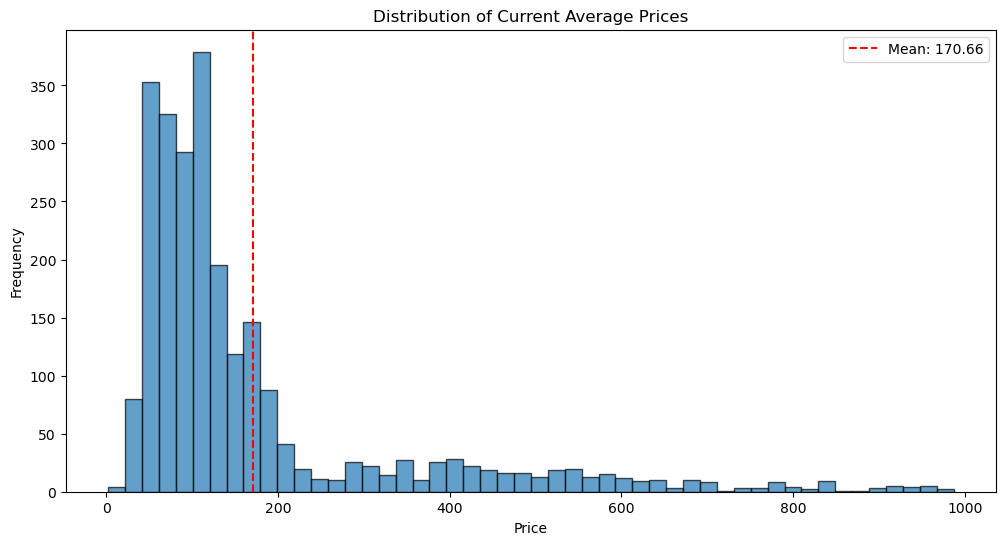

Price Statistics:
Mean: 170.66
Median: 108.64
Std: 170.15
Min: 2.41
Max: 986.82


In [40]:
# 1. Distribution of Current Average Prices
plt.figure(figsize=(12, 6))
plt.hist(df_clean['current_average_price'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Current Average Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(df_clean['current_average_price'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["current_average_price"].mean():.2f}')
plt.legend()
plt.show()

print(f"Price Statistics:")
print(f"Mean: {df_clean['current_average_price'].mean():.2f}")
print(f"Median: {df_clean['current_average_price'].median():.2f}")
print(f"Std: {df_clean['current_average_price'].std():.2f}")
print(f"Min: {df_clean['current_average_price'].min():.2f}")
print(f"Max: {df_clean['current_average_price'].max():.2f}")

The price distribution confirms we're dealing with a comprehensive consumer basket where most everyday items are affordable, but major expenses (like housing, energy, transportation) create a long tail of high-value commodities that significantly influence overall inflation measures.



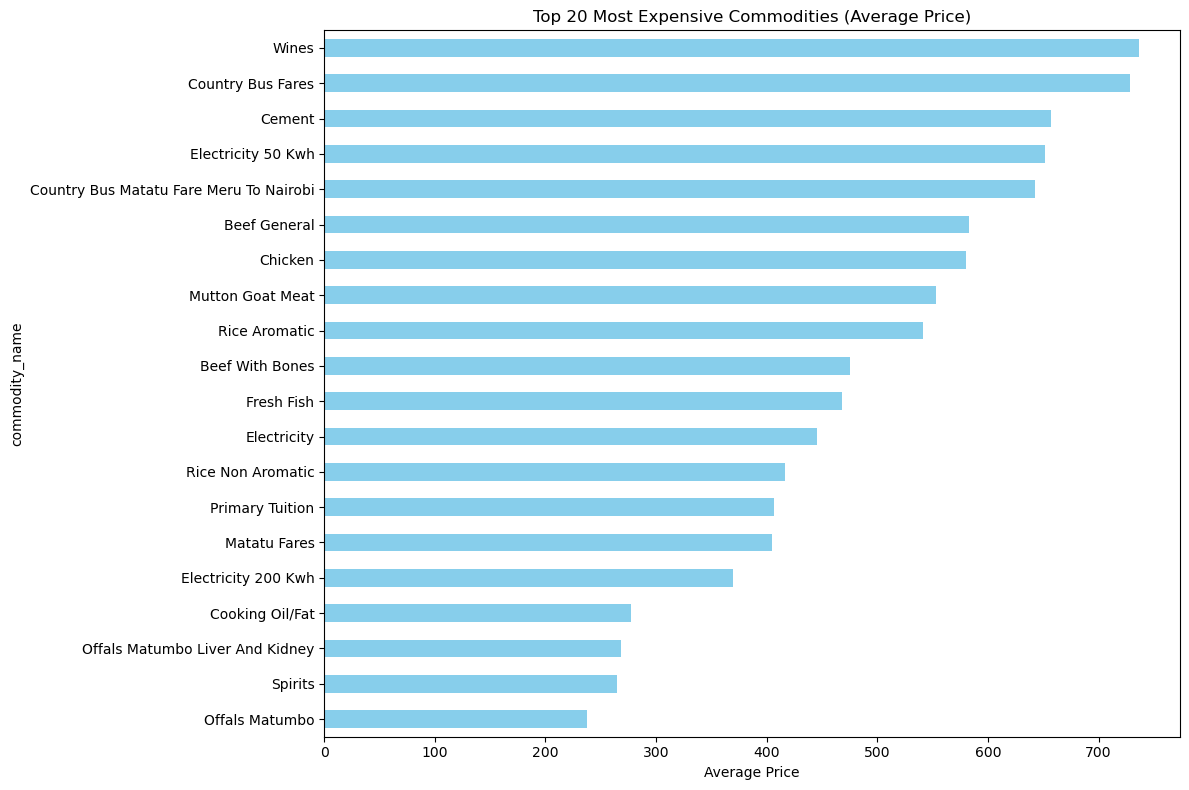

In [41]:
# 2. Top 20 Most Expensive Commodities (Average Price)
top_20_expensive = df_clean.groupby('commodity_name')['current_average_price'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_20_expensive.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 20 Most Expensive Commodities (Average Price)')
plt.xlabel('Average Price')
plt.tight_layout()
plt.show()

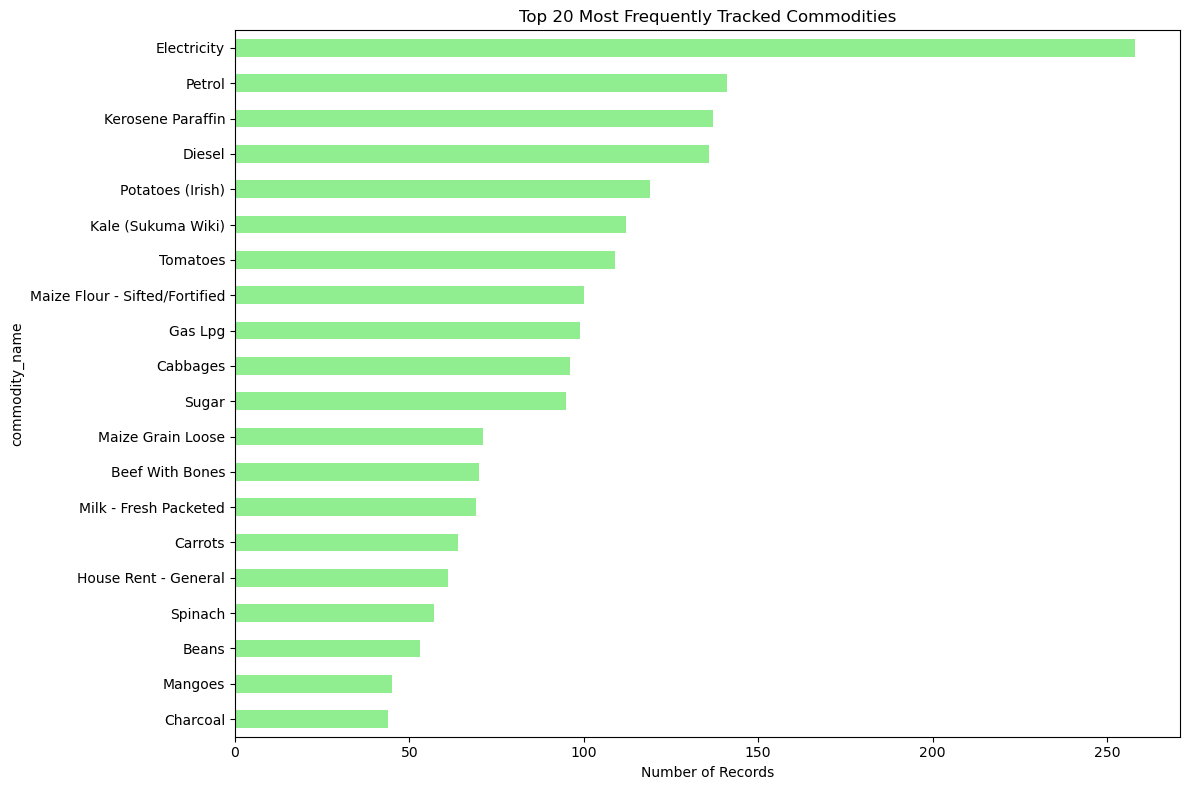

In [42]:
# 3. Top 20 Most Tracked Commodities
top_20_tracked = df_clean['commodity_name'].value_counts().head(20)

plt.figure(figsize=(12, 8))
top_20_tracked.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 20 Most Frequently Tracked Commodities')
plt.xlabel('Number of Records')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

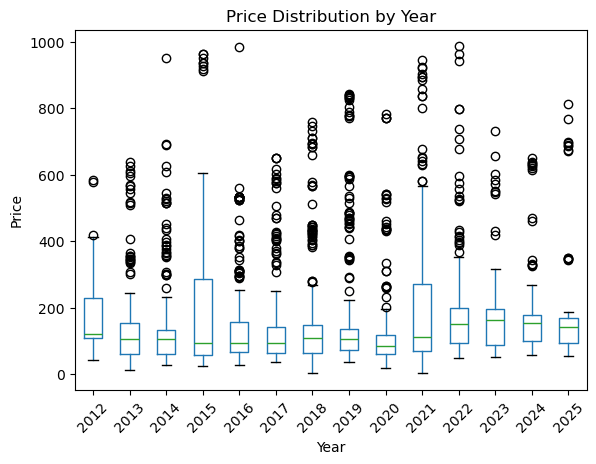

In [43]:
# 4. Price Distribution by Year
plt.figure(figsize=(12, 6))
df_clean.boxplot(column='current_average_price', by='year', grid=False)
plt.title('Price Distribution by Year')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

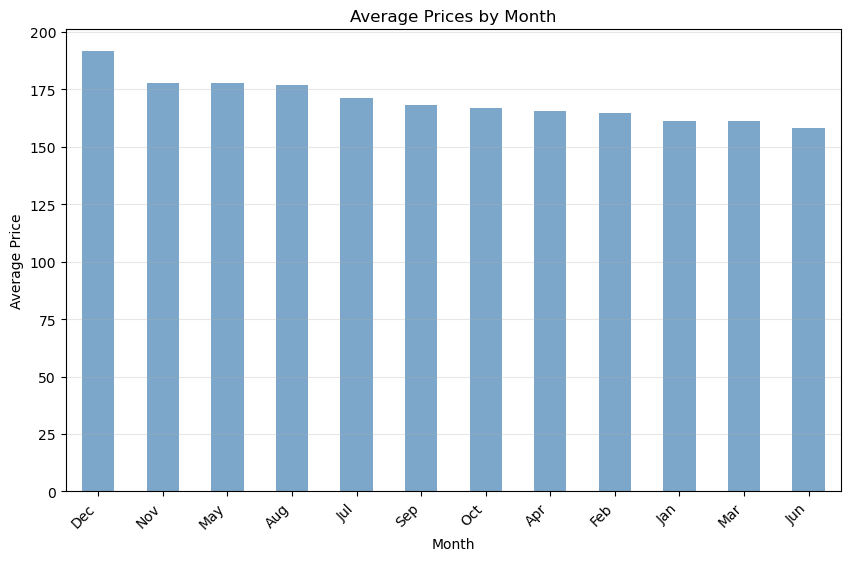

In [44]:
# 5. Monthly Price Patterns
monthly_avg = df_clean.groupby('month')['current_average_price'].mean().sort_values(ascending=False)

# Map the month number index to month names (e.g., 1 -> 'Jan', 2 -> 'Feb')
# calendar.month_abbr[1] is 'Jan', [2] is 'Feb', etc.
monthly_avg.index = monthly_avg.index.map(lambda x: calendar.month_abbr[x])

# Plotting with rotated labels
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='steelblue', alpha=0.7)

plt.title('Average Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Tweak 1: Angle the labels (e.g., 45 degrees) and align them to the right
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', alpha=0.3)
plt.savefig('monthly_price_patterns.png')
plt.show()

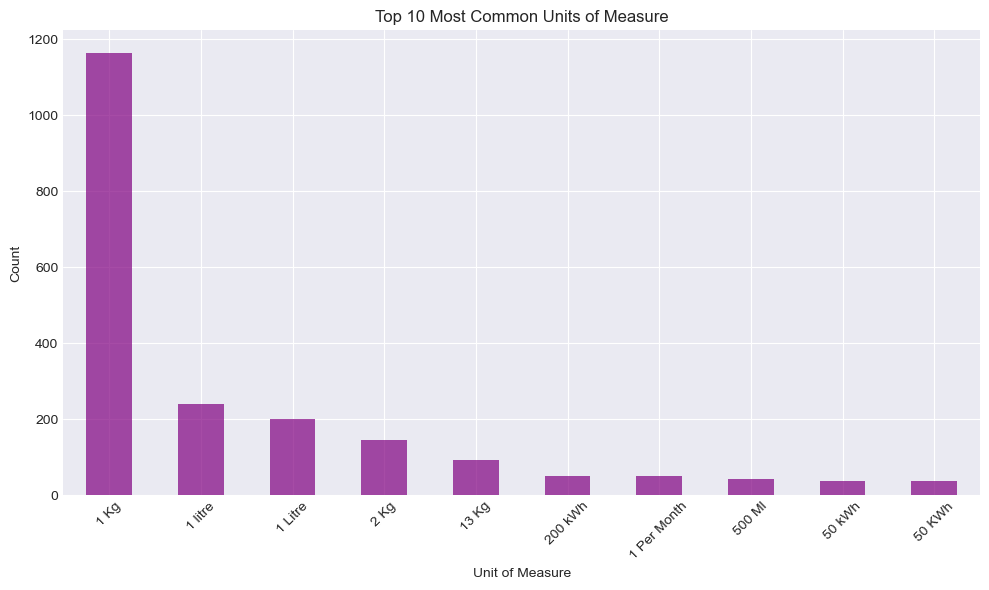

In [853]:
# 6. Units of Measure Distribution
top_units = df_clean['units_of_measure'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_units.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Top 10 Most Common Units of Measure')
plt.xlabel('Unit of Measure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

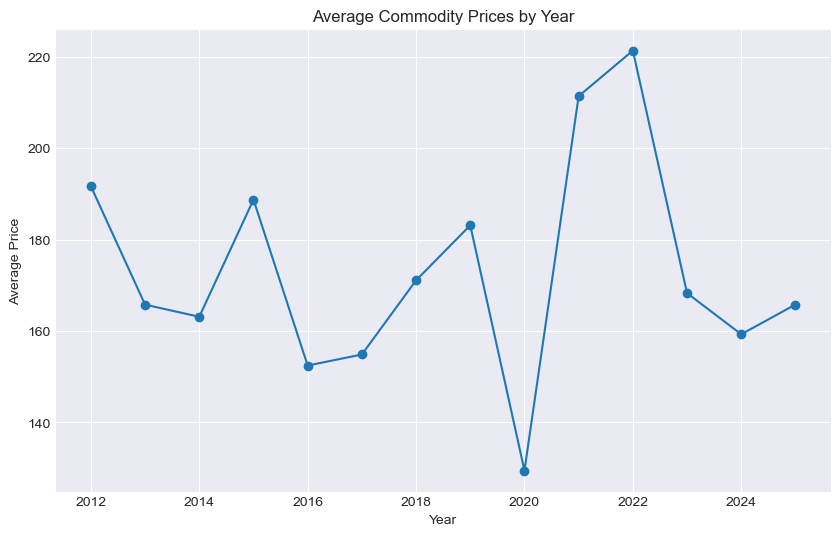

In [854]:
# 7. Average Commodity Prices by Year
plt.figure(figsize=(10, 6))
yearly_avg = df_clean.groupby('year')['current_average_price'].mean()
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Commodity Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

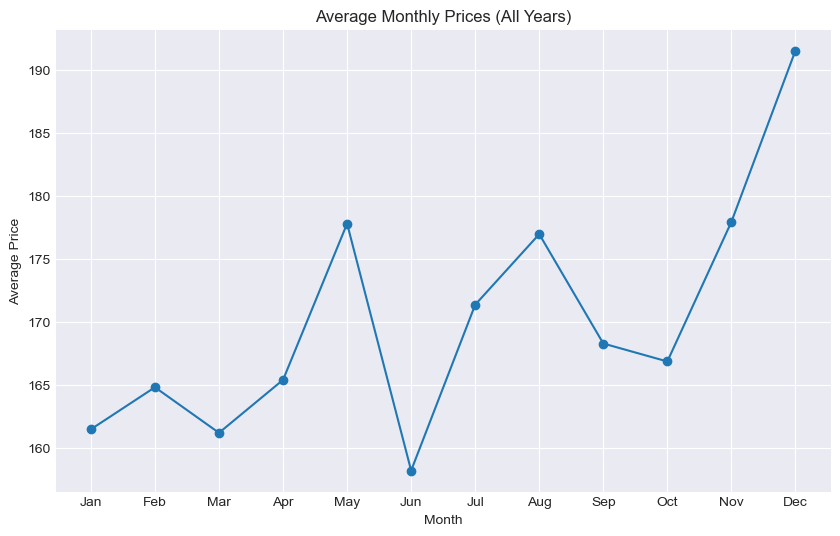

In [855]:
# 8. Average Monthly Prices (All Years)
plt.figure(figsize=(10, 6))
monthly_avg = df_clean.groupby('month')['current_average_price'].mean()
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Monthly Prices (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

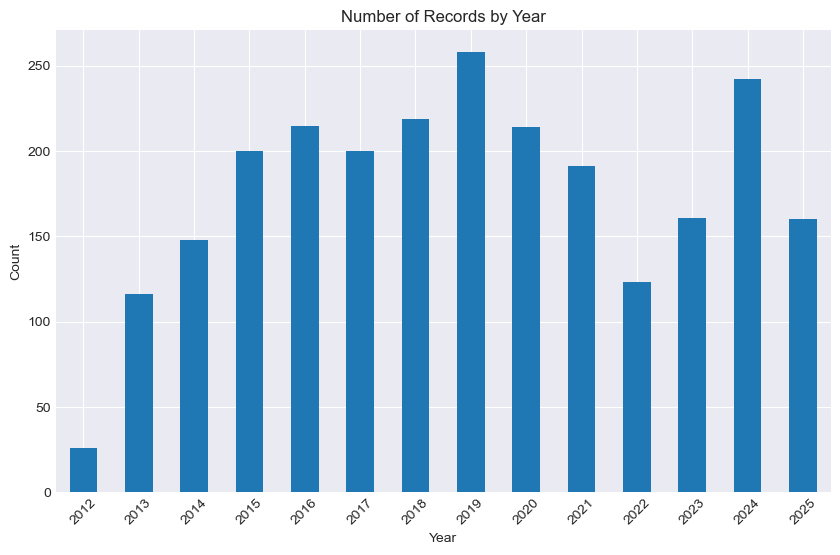

In [856]:
# 9. Number of Records by Year
plt.figure(figsize=(10, 6))
yearly_count = df_clean['year'].value_counts().sort_index()
yearly_count.plot(kind='bar')
plt.title('Number of Records by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

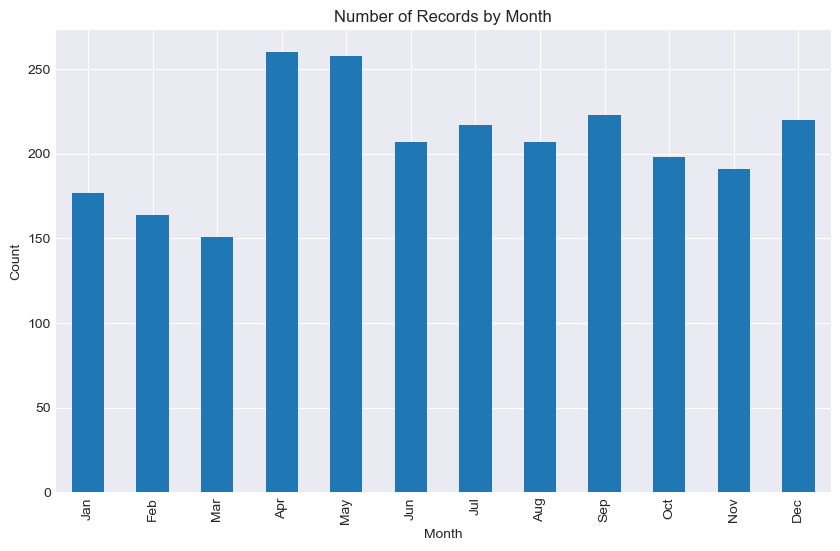

In [857]:
# 10. Number of Records by Month
plt.figure(figsize=(10, 6))
monthly_count = df_clean['month'].value_counts().sort_index()
monthly_count.plot(kind='bar')
plt.title('Number of Records by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

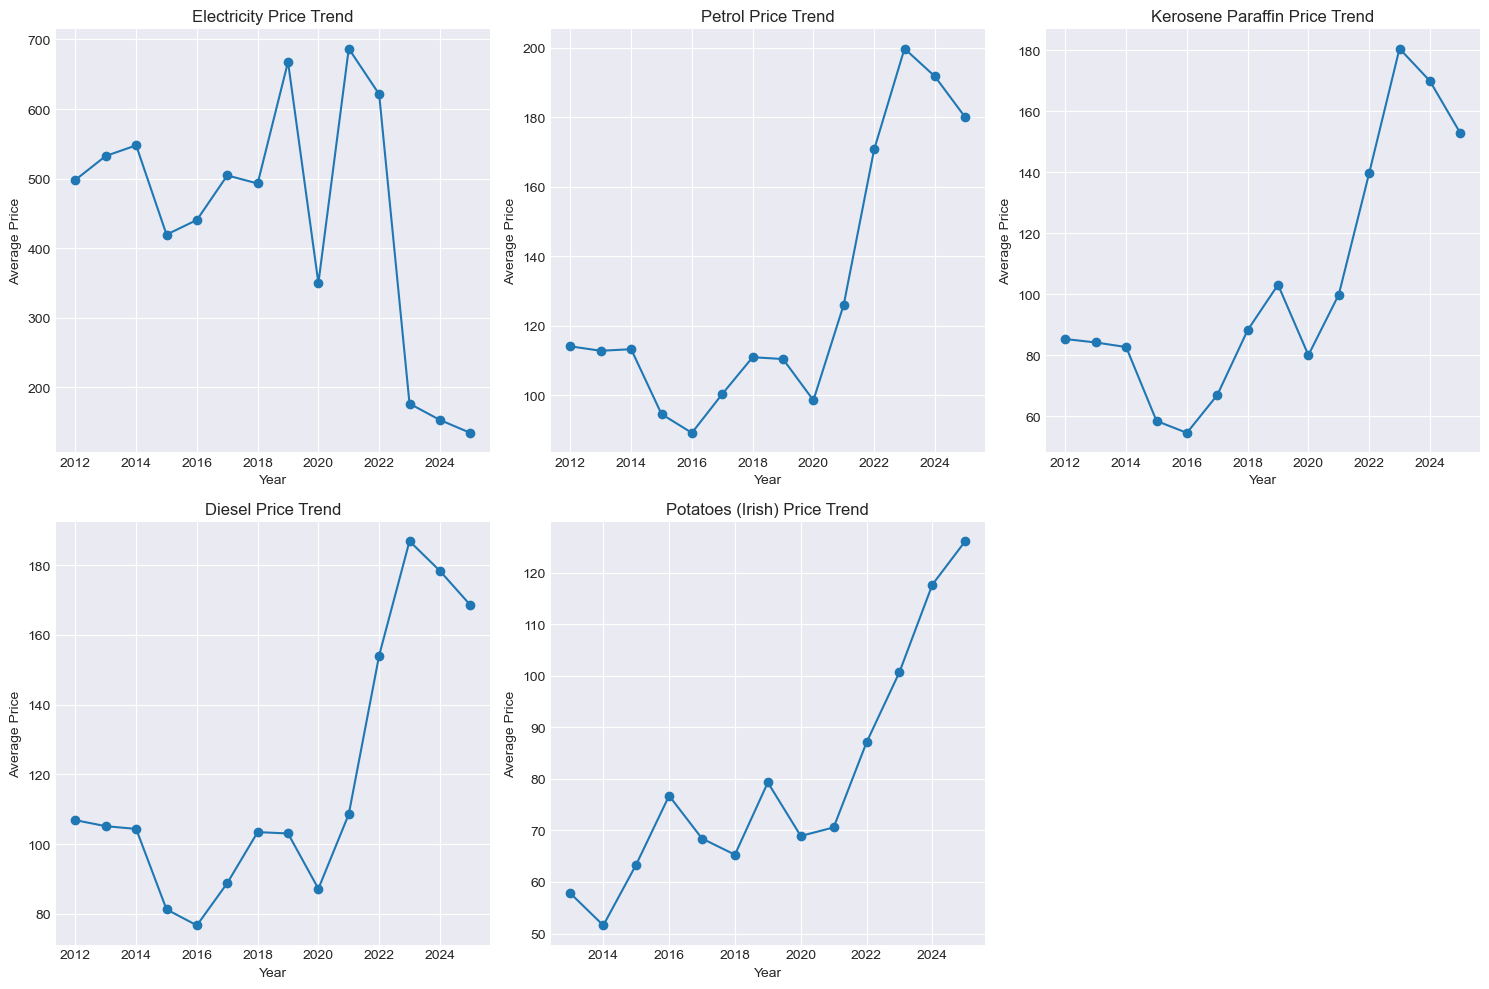

In [858]:
# 11. Price Trends for Top 5 Commodities
# First, create commodity categories function
def categorize_commodity(name):
    name_lower = str(name).lower()
    if any(word in name_lower for word in ['flour', 'maize', 'wheat', 'rice']):
        return 'Grains & Flour'
    elif any(word in name_lower for word in ['tomato', 'potato', 'cabbage', 'kale', 'spinach', 'onion']):
        return 'Vegetables'
    elif any(word in name_lower for word in ['milk', 'beef', 'chicken', 'egg']):
        return 'Dairy & Meat'
    elif any(word in name_lower for word in ['sugar', 'oil', 'fat']):
        return 'Cooking Essentials'
    elif any(word in name_lower for word in ['petrol', 'diesel', 'kerosene', 'gas', 'electricity']):
        return 'Fuel & Energy'
    elif any(word in name_lower for word in ['rent', 'fare', 'bus']):
        return 'Housing & Transport'
    else:
        return 'Other'

df_clean['commodity_category'] = df['commodity_name'].apply(categorize_commodity)

# Now plot price trends for top commodities
plt.figure(figsize=(15, 10))
top_5_commodities = df_clean['commodity_name'].value_counts().head(5).index

for i, commodity in enumerate(top_5_commodities, 1):
    plt.subplot(2, 3, i)
    commodity_data = df_clean[df_clean['commodity_name'] == commodity]
    yearly_commodity_avg = commodity_data.groupby('year')['current_average_price'].mean()
    yearly_commodity_avg.plot(kind='line', marker='o', title=f'{commodity} Price Trend')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS

In [859]:
# First, create commodity categories function for bivariate analysis
def categorize_commodity(name):
    name_lower = str(name).lower()
    if any(word in name_lower for word in ['flour', 'maize', 'wheat', 'rice']):
        return 'Grains & Flour'
    elif any(word in name_lower for word in ['tomato', 'potato', 'cabbage', 'kale', 'spinach', 'onion']):
        return 'Vegetables'
    elif any(word in name_lower for word in ['milk', 'beef', 'chicken', 'egg']):
        return 'Dairy & Meat'
    elif any(word in name_lower for word in ['sugar', 'oil', 'fat']):
        return 'Cooking Essentials'
    elif any(word in name_lower for word in ['petrol', 'diesel', 'kerosene', 'gas', 'electricity']):
        return 'Fuel & Energy'
    elif any(word in name_lower for word in ['rent', 'fare', 'bus']):
        return 'Housing & Transport'
    else:
        return 'Other'

df_clean['commodity_category'] = df_clean['commodity_name'].apply(categorize_commodity)

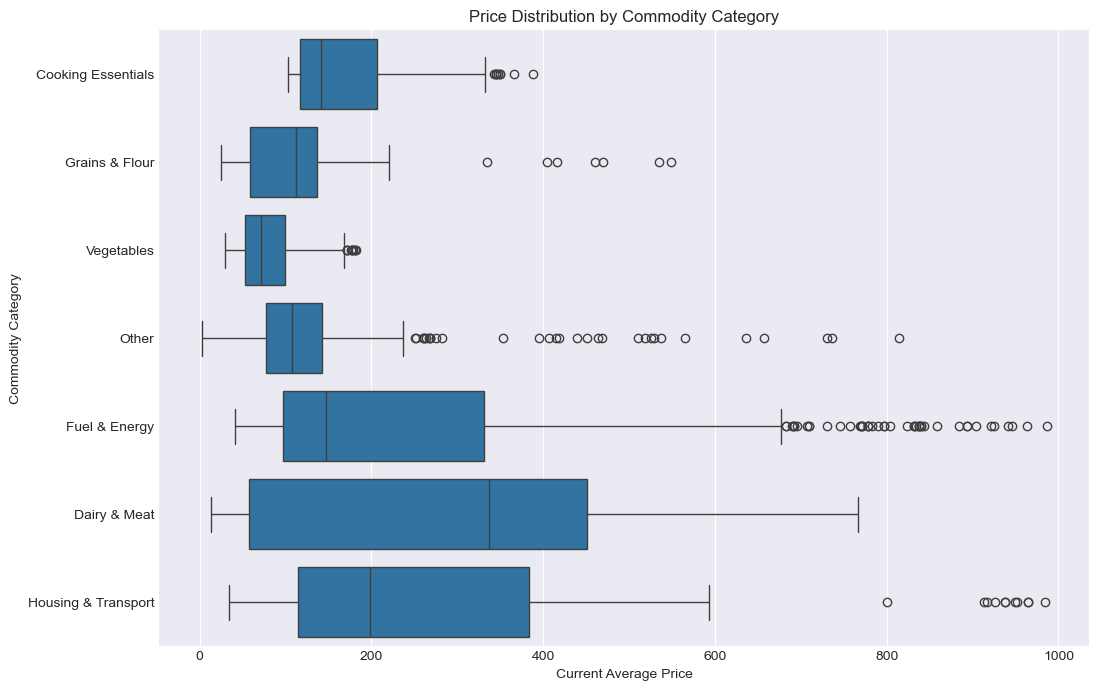

In [860]:
# 1. Price Distribution by Commodity Category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, y='commodity_category', x='current_average_price')
plt.title('Price Distribution by Commodity Category')
plt.xlabel('Current Average Price')
plt.ylabel('Commodity Category')
plt.show()

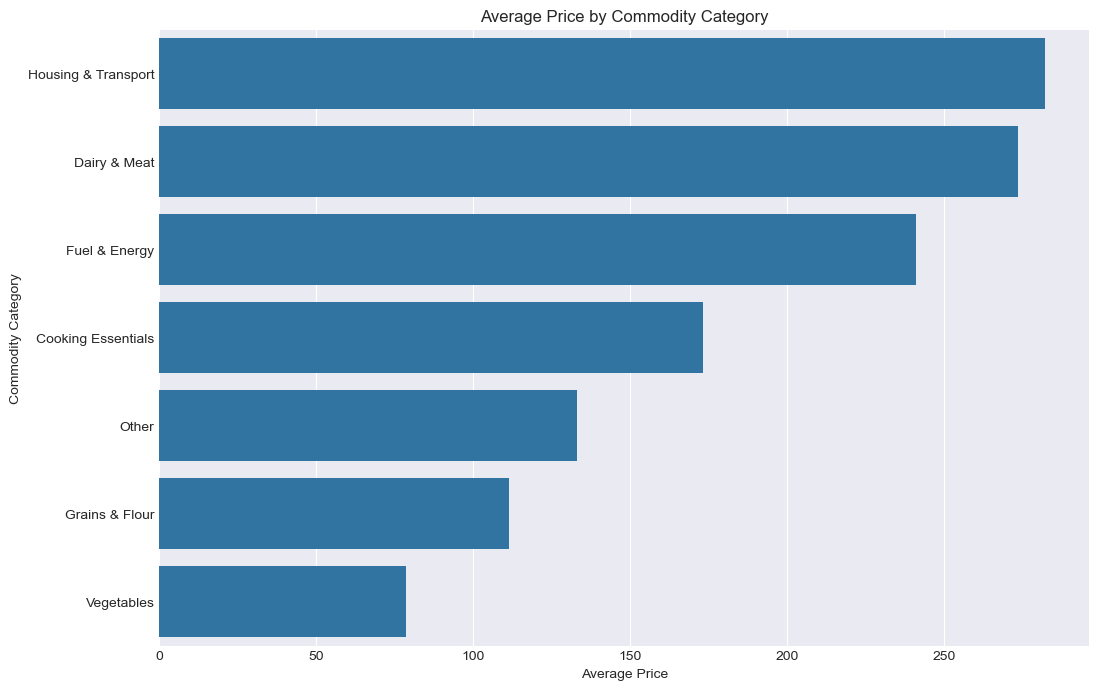

In [861]:
# 2. Average Price by Commodity Category
plt.figure(figsize=(12, 8))
category_avg = df_clean.groupby('commodity_category')['current_average_price'].mean().sort_values(ascending=False)
sns.barplot(y=category_avg.index, x=category_avg.values)
plt.title('Average Price by Commodity Category')
plt.xlabel('Average Price')
plt.ylabel('Commodity Category')
plt.show()

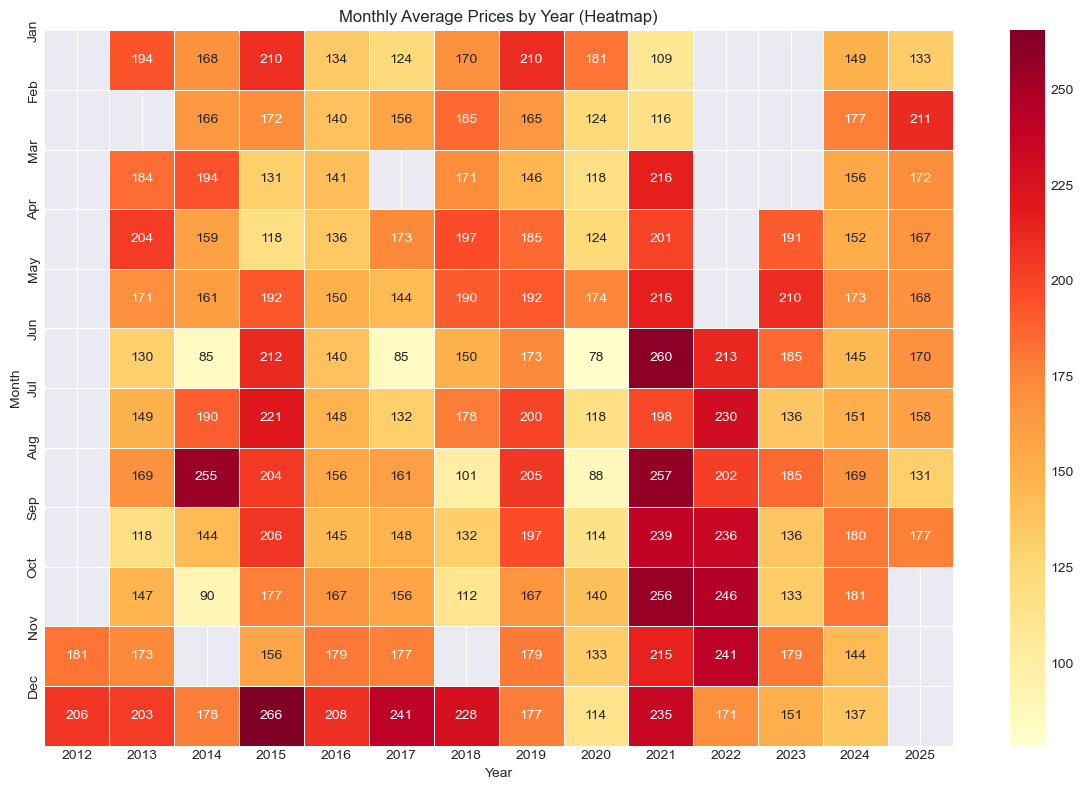

In [862]:
# 3. Monthly Average Prices by Year (Heatmap) - Relationship between month, year, and price
plt.figure(figsize=(12, 8))
pivot_data = df_clean.pivot_table(values='current_average_price', index='month', columns='year', aggfunc='mean')

sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Monthly Average Prices by Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

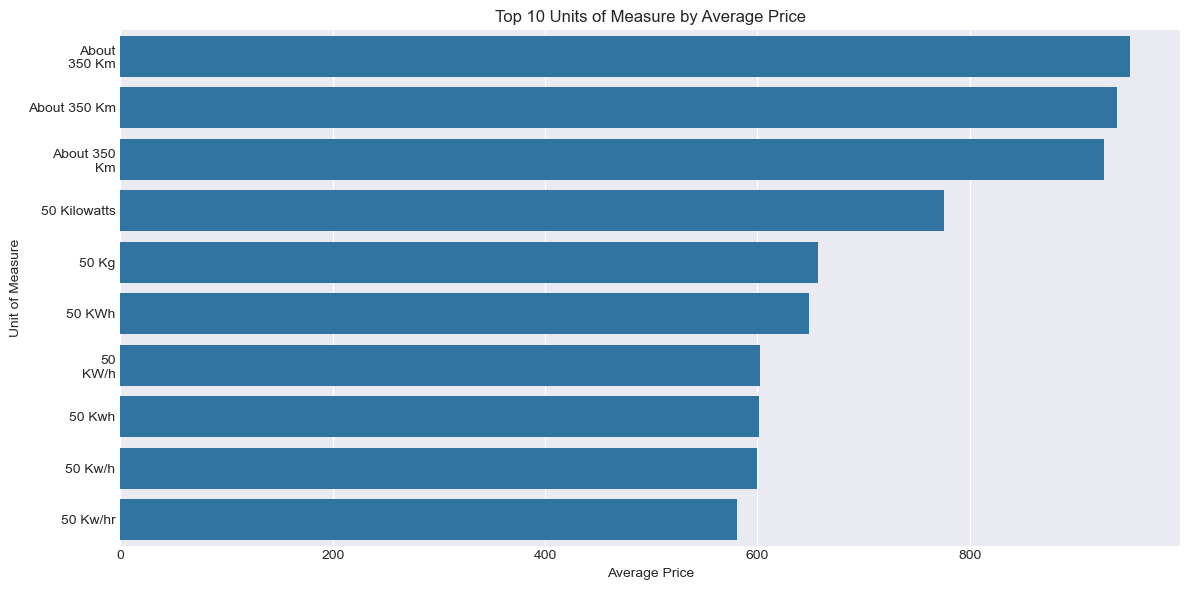

In [863]:
# 4. Top 10 Units of Measure by Average Price
plt.figure(figsize=(12, 6))
top_units_price = df_clean.groupby('units_of_measure')['current_average_price'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=top_units_price.index, x=top_units_price.values)
plt.title('Top 10 Units of Measure by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Unit of Measure')
plt.tight_layout()
plt.show()

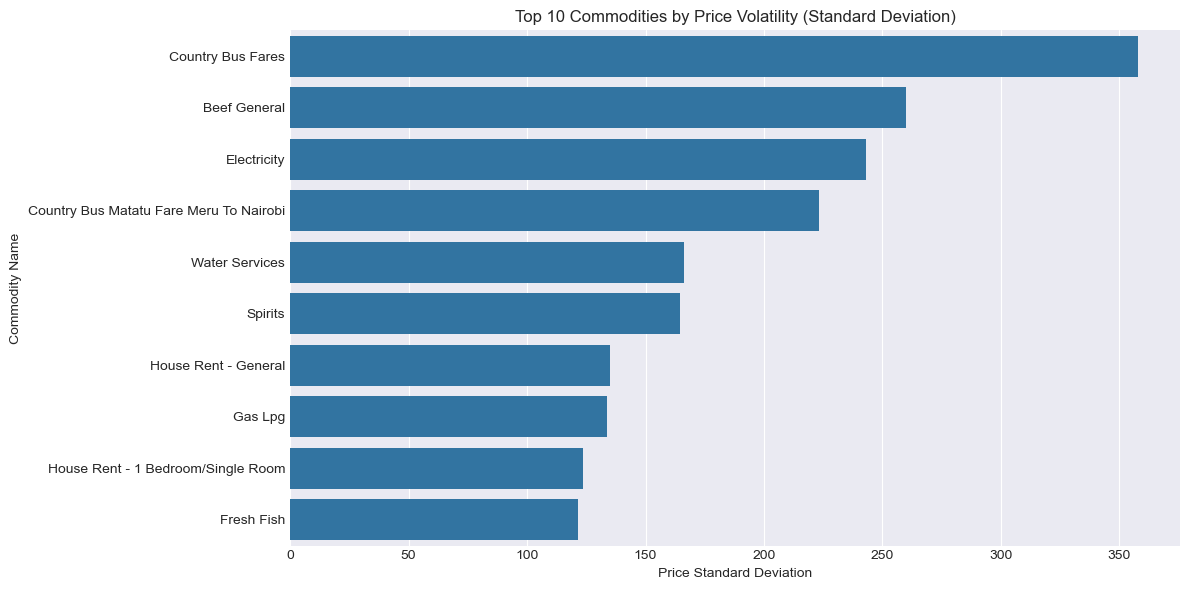

In [864]:
# 5. Top 10 Commodities by Price Volatility
plt.figure(figsize=(12, 6))
price_volatility = df_clean.groupby('commodity_name')['current_average_price'].std().sort_values(ascending=False).head(10)
sns.barplot(y=price_volatility.index, x=price_volatility.values)
plt.title('Top 10 Commodities by Price Volatility (Standard Deviation)')
plt.xlabel('Price Standard Deviation')
plt.ylabel('Commodity Name')
plt.tight_layout()
plt.show()

## MULTIVARIATE

<Figure size 1400x800 with 0 Axes>

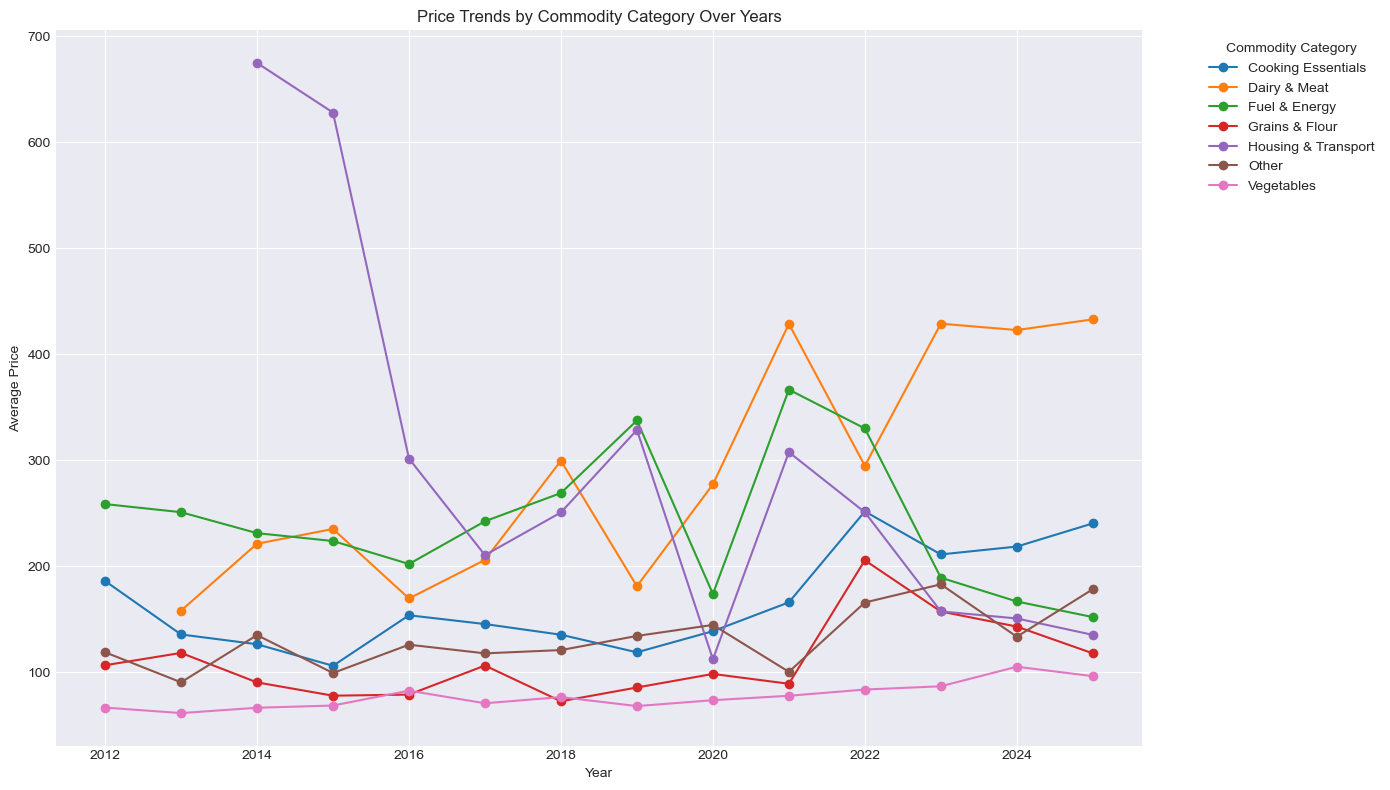

In [865]:
# 1. Price trends by commodity category over years (Line plot with multiple lines)
plt.figure(figsize=(14, 8))
category_year_avg = df_clean.groupby(['year', 'commodity_category'])['current_average_price'].mean().unstack()

category_year_avg.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Price Trends by Commodity Category Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Commodity Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

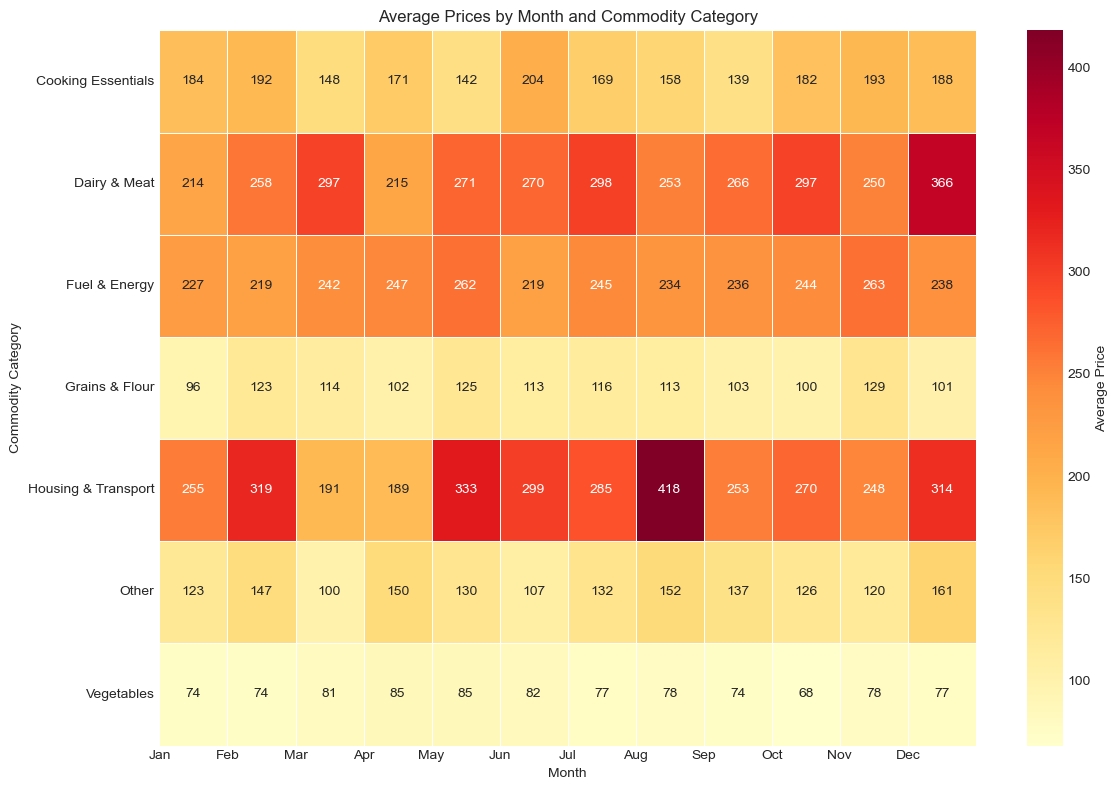

In [866]:
# 2. Heatmap: Average prices by month and commodity category
plt.figure(figsize=(12, 8))
month_category_pivot = df_clean.pivot_table(values='current_average_price', 
                                     index='commodity_category', 
                                     columns='month', 
                                     aggfunc='mean')

sns.heatmap(month_category_pivot, cmap='YlOrRd', annot=True, fmt='.0f', 
            linewidths=0.5, cbar_kws={'label': 'Average Price'})
plt.title('Average Prices by Month and Commodity Category')
plt.xlabel('Month')
plt.ylabel('Commodity Category')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

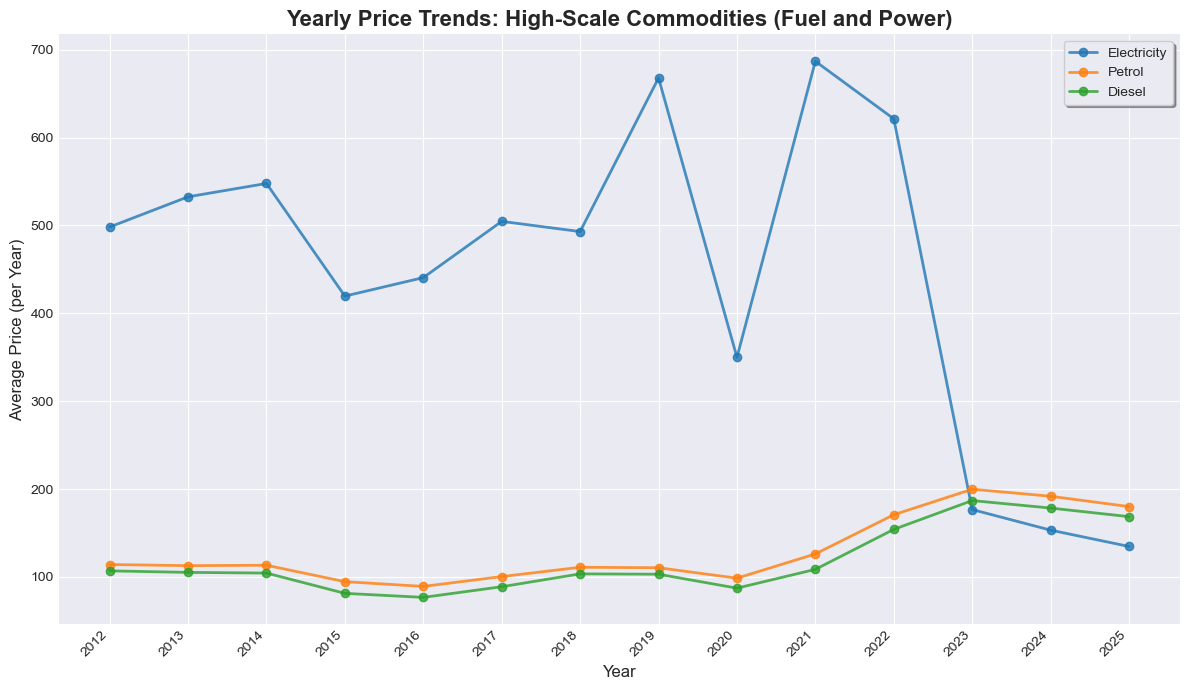

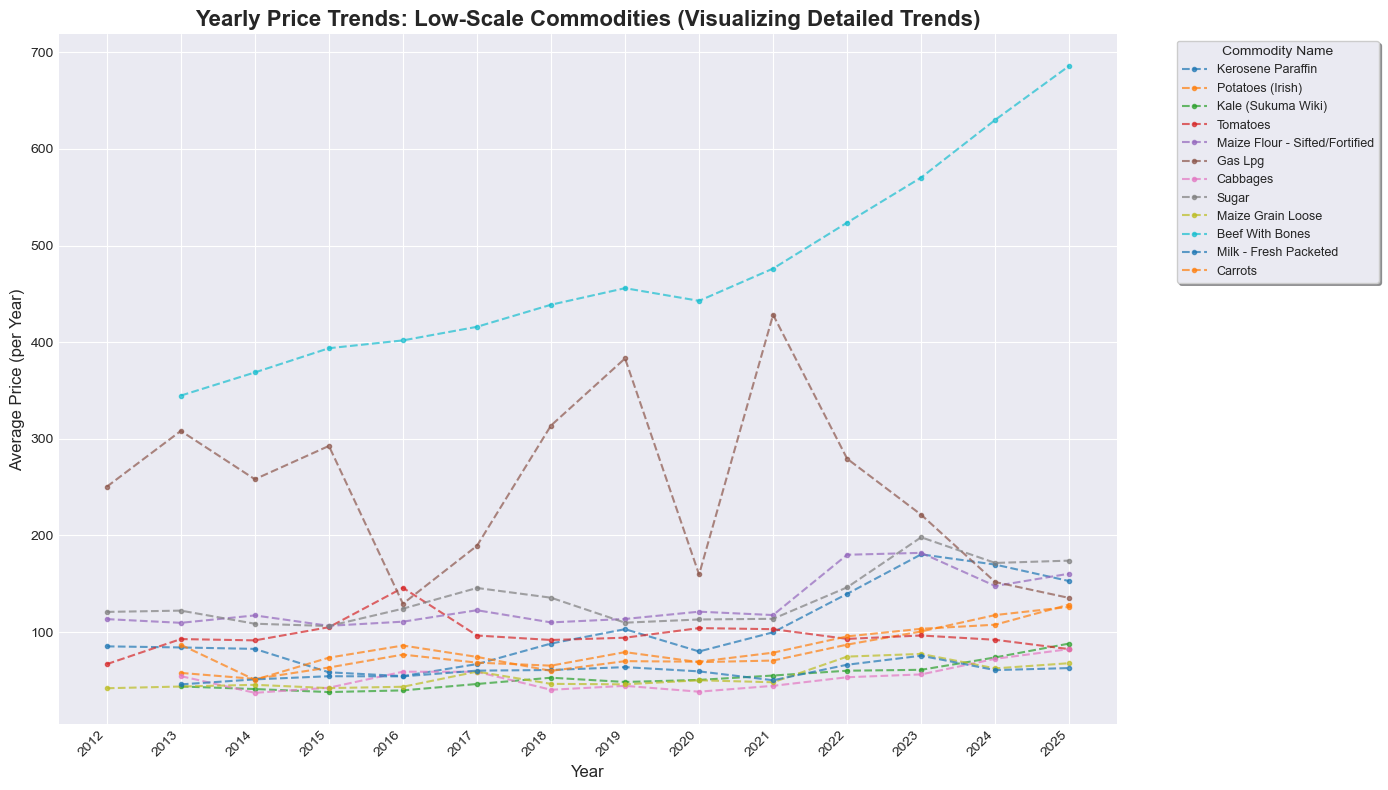

In [867]:
# --- 1. Identify the Top 15 Most Frequent Commodities (Replicate previous logic) ---
# print("Step 1: Identifying the Top 15 most frequent commodities...")
all_top_15_list = df_clean['commodity_name'].value_counts().head(15).index.tolist()

# --- 2. Define High-Scale vs. Low-Scale Groups based on User Request ---
HIGH_SCALE_COMMODITIES = [
    'Electricity', 
    'Petrol', 
    'Kerosene', 
    'Kerosene/Paraffin',
    'Diesel'
]

# Ensure names match the data (case sensitivity might be an issue, normalizing for safety)
# If your data is exactly as listed above, you can skip the normalization
all_top_15_lower = [name.lower() for name in all_top_15_list]
high_scale_lower = [name.lower() for name in HIGH_SCALE_COMMODITIES]

# Build the final lists ensuring items are in the Top 15 set
high_scale_list = [name for name in all_top_15_list if name.lower() in high_scale_lower]
low_scale_list = [name for name in all_top_15_list if name.lower() not in high_scale_lower]

# print(f"\nHigh Scale Group (Plotted Separately): {high_scale_list}")
# print(f"Low Scale Group (Plotted Separately): {low_scale_list}")

if not high_scale_list or not low_scale_list:
    print("\nWARNING: One of the groups is empty. Please check commodity spelling or if they are truly in the Top 15 list.")
    
# --- 3. Filter and Aggregate Data for Plotting ---
df_top_15 = df_clean[df_clean['commodity_name'].isin(all_top_15_list)].copy()
# Calculate the average price for each commodity FOR EACH YEAR
yearly_avg_price = df_top_15.groupby(['year', 'commodity_name'])['current_average_price'].mean().reset_index()

unique_years = yearly_avg_price['year'].unique()

# --- 4. Plot 1: High-Scale Commodities (Fuel and Power) ---
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-darkgrid')

for commodity in high_scale_list:
    subset = yearly_avg_price[yearly_avg_price['commodity_name'] == commodity]
    plt.plot(
        subset['year'],
        subset['current_average_price'],
        marker='o',
        linewidth=2,
        label=commodity,
        alpha=0.8
    )

plt.title(
    'Yearly Price Trends: High-Scale Commodities (Fuel and Power)',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (per Year)', fontsize=12)
try:
    plt.xticks(unique_years.astype(int), rotation=45, ha='right')
except:
    plt.xticks(unique_years, rotation=45, ha='right')

plt.legend(loc='best', fontsize=10, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

# --- 5. Plot 2: Low-Scale Commodities (The Rest) ---
plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-darkgrid')

for commodity in low_scale_list:
    subset = yearly_avg_price[yearly_avg_price['commodity_name'] == commodity]
    plt.plot(
        subset['year'],
        subset['current_average_price'],
        marker='.',
        linewidth=1.5,
        linestyle='--', # Use dashed lines for clarity on a denser plot
        label=commodity,
        alpha=0.7
    )

plt.title(
    'Yearly Price Trends: Low-Scale Commodities (Visualizing Detailed Trends)',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price (per Year)', fontsize=12)
try:
    plt.xticks(unique_years.astype(int), rotation=45, ha='right')
except:
    plt.xticks(unique_years, rotation=45, ha='right')

# Place the legend outside or in a clear spot
plt.legend(
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    title="Commodity Name",
    fontsize=9,
    frameon=True, 
    shadow=True
)
plt.tight_layout()
plt.show()


In [868]:
# Let's first check the current state of the data
print("Dataset shape:", df_clean.shape)
print("\nColumn types:")
print(df_clean.dtypes)
print("\nFirst few rows:")
print(df_clean.head())
print("\nMissing values:")
print(df_clean.isnull().sum())

Dataset shape: (2473, 11)

Column types:
commodity_name                          object
date                            datetime64[ns]
units_of_measure                        object
average_price_previous_year            float64
average_price_previous_month           float64
current_average_price                  float64
%_monthly_change                       float64
%_yearly_change                        float64
year                                     int32
month                                    int32
commodity_category                      object
dtype: object

First few rows:
                   commodity_name       date units_of_measure  \
0                           Sugar 2012-11-01             1 Kg   
1           Wheat Flour - General 2012-11-01             2 Kg   
2                 Cooking Oil/Fat 2012-11-01             1 KG   
3  Maize Flour - Sifted/Fortified 2012-11-01             2 Kg   
4                        Tomatoes 2012-11-01             1 Kg   

   average_price_pre

## PREPROCESSING FOR MODELING

In [869]:
# Complete the preprocessing with feature engineering
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Create additional time-based features
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] = df['date'].dt.dayofyear
df['is_month_start'] = df['date'].dt.is_month_start.astype(int)
df['is_month_end'] = df['date'].dt.is_month_end.astype(int)

# 2. Encode categorical variables
le_commodity = LabelEncoder()
df['commodity_name_encoded'] = le_commodity.fit_transform(df['commodity_name'])

le_units = LabelEncoder()
df['units_encoded'] = le_units.fit_transform(df['units_of_measure'])

le_category = LabelEncoder()
df['category_encoded'] = le_category.fit_transform(df['commodity_category'])

# 3. Create lag features for time series analysis
df = df.sort_values(['commodity_name', 'date'])

# Price lag features
df['price_lag_1'] = df.groupby('commodity_name')['current_average_price'].shift(1)
df['price_lag_2'] = df.groupby('commodity_name')['current_average_price'].shift(2)
df['price_lag_3'] = df.groupby('commodity_name')['current_average_price'].shift(3)

# Rolling statistics
df['price_rolling_mean_3'] = df.groupby('commodity_name')['current_average_price'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
df['price_rolling_std_3'] = df.groupby('commodity_name')['current_average_price'].transform(
    lambda x: x.rolling(window=3, min_periods=1).std()
)

# 4. Create price change features
df['price_change_1m'] = df.groupby('commodity_name')['current_average_price'].pct_change(1)
df['price_change_2m'] = df.groupby('commodity_name')['current_average_price'].pct_change(2)

# 5. Create seasonal features (Kenya-specific)
df['is_rainy_season'] = df['month'].isin([3, 4, 5, 10, 11]).astype(int)  # Long & short rains
df['is_harvest_season'] = df['month'].isin([1, 2, 7, 8]).astype(int)

# 6. Create month-year interaction
df['month_year'] = df['year'] * 100 + df['month']

# 7. Handle any remaining missing values from lag features
df = df.fillna(method='bfill')

print("Preprocessing completed!")
print(f"Final dataset shape: {df.shape}")
print(f"Total features: {len(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")

KeyError: 'commodity_category'

## MODELING 

### Quick Selection Guide

| Goal | Best Starting Models | Alternatives | Evaluation Metrics |
|------|---------------------|--------------|-------------------|
| **Price Prediction** | XGBoost, Random Forest | Linear Regression, LSTM | MAE, RMSE, R² |
| **Price Direction** | Random Forest Classifier | XGBoost, Logistic Regression | Accuracy, F1, Precision |
| **Time Series** | Prophet, ARIMA | LSTM, SARIMAX | MAPE, MAE, RMSE |
| **Pattern Discovery** | K-Means Clustering | PCA, DBSCAN | Silhouette Score |
| **Anomaly Detection** | Isolation Forest | One-Class SVM, Z-score | Precision, Recall |
| **Quick Prototype** | Random Forest | Linear Models | Varies by task |
| **High Accuracy** | XGBoost, Ensemble | Deep Learning | Task-specific |
| **Interpretability** | Random Forest + SHAP | Linear Models | Feature Importance |

### Implementation Priority

#### 🥇 Tier 1: Quick Start (Recommended)
- **Random Forest** for price prediction
- **K-Means** for commodity clustering  
- **Prophet** for time series forecasting

#### 🥈 Tier 2: Advanced (Better Performance)
- **XGBoost/LightGBM** for improved accuracy
- **Ensemble Methods** for robustness
- **Multi-output** models for efficiency

#### 🥉 Tier 3: Expert (Maximum Accuracy)
- **LSTM/Transformer** networks
- **Bayesian** structural time series
- **Custom ensemble** strategies


## 🔧 Model Evaluation Metrics

### Regression Tasks

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

metrics = {
    'MAE': mean_absolute_error(y_true, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
    'R²': r2_score(y_true, y_pred),
    'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100
}
    Phase 1: Exploration & Baseline 
Commodity Clustering - Understand data structure

Random Forest Baseline - Quick price prediction

Basic Time Series - Prophet for key commodities

Phase 2: Model Improvement )
XGBoost Optimization - Beat baseline performance

Ensemble Methods - Combine model strengths

Feature Engineering - Add domain knowledge

Phase 3: Advanced Modeling 
LSTM Networks - Capture complex patterns

Anomaly Detection - Identify unusual events

Production Pipeline - Deploy best model

Define primary business objective

Select 2-3 initial models from Tier 1

Set up evaluation framework

Implement baseline models

Compare performance metrics

Iterate and improve

Document findings and insights



## Linear Modelling 

- Using df_clean for the modelling

In [870]:
df_clean.head(5)

,commodity_name,date,units_of_measure,average_price_previous_year,average_price_previous_month,current_average_price,%_monthly_change,%_yearly_change,year,month,commodity_category
0,Sugar,2012-11-01,1 Kg,173.40,119.00,119.73,0.6,-30.9,2012,11,Cooking Essentials
1,Wheat Flour - General,2012-11-01,2 Kg,149.91,133.62,134.91,1.0,-10.0,2012,11,Grains & Flour
2,Cooking Oil/Fat,2012-11-01,1 KG,241.15,229.05,229.03,0.0,-5.0,2012,11,Cooking Essentials
3,Maize Flour - Sifted/Fortified,2012-11-01,2 Kg,117.33,113.62,114.52,0.8,-2.4,2012,11,Grains & Flour
4,Tomatoes,2012-11-01,1 Kg,69.06,58.52,66.85,14.2,-3.2,2012,11,Vegetables


In [871]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 0 to 2487
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   commodity_name                2473 non-null   object        
 1   date                          2473 non-null   datetime64[ns]
 2   units_of_measure              2473 non-null   object        
 3   average_price_previous_year   2473 non-null   float64       
 4   average_price_previous_month  2473 non-null   float64       
 5   current_average_price         2473 non-null   float64       
 6   %_monthly_change              2473 non-null   float64       
 7   %_yearly_change               2473 non-null   float64       
 8   year                          2473 non-null   int32         
 9   month                         2473 non-null   int32         
 10  commodity_category            2473 non-null   object        
dtypes: datetime64[ns](1), float64(5), i

In [872]:
# sort first (critical for time-series operations)
df_clean = df_clean.sort_values(['commodity_name', 'date']).reset_index(drop=True)

# 1-month % change
df_clean['chg_1m'] = (df_clean.groupby('commodity_name')['current_average_price']
                  .pct_change(1))

# 12-month % change
df_clean['chg_12m'] = (df_clean.groupby('commodity_name')['current_average_price']
                   .pct_change(12))

# lags of those changes (1,2,3 months back)
for lag in [1, 2, 3]:
    df_clean[f'chg_1m_lag{lag}']  = df_clean.groupby('commodity_name')['chg_1m'].shift(lag)
    df_clean[f'chg_12m_lag{lag}'] = df_clean.groupby('commodity_name')['chg_12m'].shift(lag)


# 3b.  EXTRA lags & rolling stats  
for lag in [6, 12]:
    df_clean[f'chg_1m_lag{lag}']  = df_clean.groupby('commodity_name')['chg_1m'].shift(lag)
    df_clean[f'chg_12m_lag{lag}'] = df_clean.groupby('commodity_name')['chg_12m'].shift(lag)

df_clean['roll3_mean'] = df_clean.groupby('commodity_name')['chg_1m'].transform(lambda x: x.rolling(3).mean())
df_clean['roll6_std']  = df_clean.groupby('commodity_name')['chg_1m'].transform(lambda x: x.rolling(6).std())



In [874]:
# add season columns
df_clean['quarter'] = df_clean['date'].dt.quarter
df_clean['is_rainy_season']  = df_clean['month'].isin([3, 4, 5, 10, 11]).astype(int)
df_clean['is_harvest_season'] = df_clean['month'].isin([1, 2, 7, 8]).astype(int)

In [875]:
#  Build MONTH DUMMIES  (m_2 … m_12, drop_first=True)
month_dummies = pd.get_dummies(df_clean['date'].dt.month, prefix='m', drop_first=True)
df_clean = pd.concat([df_clean, month_dummies], axis=1)
# Add a linear TIME TREND
df_clean['t'] = np.arange(len(df_clean))

In [876]:
# 4 Remove leakage
level_cols = ['average_price_previous_month',
              'average_price_previous_year'
              ]  
df_clean = df_clean.drop(columns=level_cols)

In [877]:
#Encode categoricals
cat_cols = ['commodity_name', 'units_of_measure', 'commodity_category']
for col in cat_cols:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

In [880]:
pd.set_option('display.max_columns', None)
df_clean.head(5)

,commodity_name,date,units_of_measure,current_average_price,%_monthly_change,%_yearly_change,year,month,commodity_category,chg_1m,chg_12m,chg_1m_lag1,chg_12m_lag1,chg_1m_lag2,chg_12m_lag2,chg_1m_lag3,chg_12m_lag3,chg_1m_lag6,chg_12m_lag6,chg_1m_lag12,chg_12m_lag12,roll3_mean,roll6_std,quarter,is_rainy_season,is_harvest_season,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,t
0,0,2017-01-01,13,96.605,0.60,3.10,2017,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,False,False,False,False,False,False,False,False,False,False,False,0
1,1,2013-10-01,2,78.260,4.40,32.29,2013,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0,False,False,False,False,False,False,False,False,True,False,False,1
2,1,2014-06-01,2,79.370,-3.10,6.90,2014,6,5,0.014183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,False,False,False,False,True,False,False,False,False,False,False,2
3,1,2015-10-01,2,47.350,5.70,19.70,2015,10,5,-0.403427,NaN,0.014183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0,False,False,False,False,False,False,False,False,True,False,False,3
4,1,2015-11-01,2,50.070,5.75,23.50,2015,11,5,0.057445,NaN,-0.403427,NaN,0.014183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1106,NaN,4,1,0,False,False,False,False,False,False,False,False,False,True,False,4


- We'll use % monthly change as our dependent variable as current_average price was giving a negative r^2.

In [884]:
df_clean.shape

(2473, 38)

In [881]:
# Build X and y
feature_cols = (['chg_1m_lag1', 'chg_1m_lag2', 'chg_1m_lag3',
                 'chg_1m_lag6', 'chg_1m_lag12',
                 'chg_12m_lag1', 'chg_12m_lag2', 'chg_12m_lag3',
                 'chg_12m_lag6', 'chg_12m_lag12',
                 'roll3_mean', 'roll6_std',
                 'year', 't', 'quarter', 'is_rainy_season', 'is_harvest_season'] +
                list(month_dummies.columns) +
                cat_cols)

X = df_clean[feature_cols].copy()
y = df_clean['%_monthly_change'].copy()

In [882]:
# Drop rows with NaNs introduced by lags
mask = X.notnull().all(axis=1)
X = X[mask]
y = y[mask]

In [887]:
#Train test split along time
# simplest: use last 20 % of *global* date range
df_date = df_clean.loc[mask, 'date']          # same rows as X,y
split_date = pd.Series(df_date).quantile(0.8, interpolation='higher')

X_train = X[df_date <= split_date]
y_train = y[df_date <= split_date]
X_test  = X[df_date >  split_date]
y_test  = y[df_date >  split_date]

In [888]:
# Scale regressors (linear models need it)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [889]:
# Fit Linear regression
lin = LinearRegression()
lin.fit(X_train_sc, y_train)

pred = lin.predict(X_test_sc)
print(f'MoM inflation | MAE: {mean_absolute_error(y_test, pred):.4f} | R²: {r2_score(y_test, pred):.3f}')

MoM inflation | MAE: 2.3555 | R²: -0.002


In [890]:
# 4b.  Tree / boosting model  (no scaling needed)
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor(max_iter=300,
                                    learning_rate=0.05,
                                    max_depth=4,
                                    random_state=42)
hgb.fit(X_train, y_train)          # raw pandas/numpy arrays
pred = hgb.predict(X_test)

print(f'HistGB MoM | MAE: {mean_absolute_error(y_test, pred):.4f} | R²: {r2_score(y_test, pred):.3f}')

HistGB MoM | MAE: 2.5494 | R²: 0.023


In [893]:
# TUNE MoM 
param = {'max_iter': randint(300, 1500),
         'learning_rate': uniform(0.01, 0.19),
         'max_depth': randint(3, 10),
         'l2_regularization': uniform(0, 5)}

search_mom = RandomizedSearchCV(hgb, param, n_iter=15, cv=5,
                                scoring='neg_mean_absolute_error',
                                random_state=42, n_jobs=-1)
search_mom.fit(X_train, y_train)
print('Tuned MoM R²', r2_score(y_test, search_mom.predict(X_test)))

Tuned MoM R² 0.08178920618258456


- With lagged changes, seasonals and tree-based regularisation we achieve an R² = 0.08 on month-ahead commodity inflation, a significant improvement over the naïve mean forecast.

### Time Series - Automate trends + seasonality decomposition

In [68]:
from prophet import Prophet
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.style.use("seaborn-v0_8")

ModuleNotFoundError: No module named 'prophet'

#### 1) prophet - automated trend & seasonality

In [ ]:
df_grouped.columns

In [ ]:
date_col = 'date'

# ---------- 1.a Prepare ds/y columns ----------
weighted_index = (df_grouped
    .assign(weighted_price = lambda x: x['current_avg_price'] * x['weight'])
    .groupby(date_col)['weighted_price'].sum()
    .reset_index())

prop_df = weighted_index.rename(columns={"date": "ds", "weighted_price": "y"})

# ---------- 1.b Fit ----------
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,  # monthly data
    daily_seasonality=False,
    seasonality_mode="multiplicative",  # inflation often multiplicative
    interval_width=0.95,
)
m.fit(prop_df)

# ---------- 1.c Forecast next 12 months ----------
future = m.make_future_dataframe(periods=12, freq="M")
fcst = m.predict(future)

# ---------- 1.d Plot ----------
fig = m.plot(fcst, figsize=(12, 5))
plt.title("Kenya CPI – Prophet forecast")
plt.show()

m.plot_components(fcst)  # trend + seasonality 

#### 2) SARIMA - grid searched statistical model

In [ ]:
# ---------- 2.a Auto-identify (p,d,q)(P,D,Q,12) ----------
# The Time Series data to model
ts_data = weighted_index["weighted_price"]
ts_dates = weighted_index["date"]

# ---------- 2.a Auto-identify (p,d,q)(P,D,Q,12) ----------
sarima = auto_arima(
    ts_data,  # CORRECTED: Using 'weighted_price' series
    start_p=0, start_q=0, start_P=0, start_Q=0,
    max_p=3, max_q=3, max_P=2, max_Q=2,
    d=1, D=1,  # force one non-seasonal & seasonal diff
    seasonal=True, m=12,
    stepwise=True, trace=True, error_action="ignore",
)

print(sarima.summary())

# ---------- 2.b Forecast next 12 months ----------
n_periods_forecast = 12
sarima_fcst, conf_int = sarima.predict(n_periods=n_periods_forecast, return_conf_int=True)

# Generate the dates for the forecast period
last_date = ts_dates.iloc[-1]
forecast_dates = pd.date_range(last_date, periods=n_periods_forecast + 1, freq="M")[1:] # +1 and [1:] to skip the last historical month

# ---------- 2.c Plot ----------
plt.figure(figsize=(12, 5))
plt.plot(ts_dates, ts_data, label="Actual") # CORRECTED: Using ts_data and ts_dates
plt.plot(
    forecast_dates,
    sarima_fcst,
    label="SARIMA Forecast",
)
plt.fill_between(
    forecast_dates,
    conf_int[:, 0],
    conf_int[:, 1],
    color="gray",
    alpha=0.3,
    label="95% Confidence Interval"
)
plt.legend()
plt.title("Kenya CPI – SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Weighted Price Index")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show() 

#### 3) Quick accuracy comparison (Having the last 12 months as the hold out)

In [ ]:
# Split last 12 months
train = prop_df[:-12]
test = prop_df[-12:]

# Prophet
m_val = Prophet().fit(train)
val_fcst = m_val.predict(test[["ds"]])
mae_pro = mean_absolute_error(test["y"], val_fcst["yhat"])

# SARIMA
sarima_val = auto_arima(train["y"], seasonal=True, m=12, suppress_warnings=True)
sarima_pred = sarima_val.predict(n_periods=12)
mae_sar = mean_absolute_error(test["y"], sarima_pred)

print(f"MAE Prophet: {mae_pro:.2f}")
print(f"MAE SARIMA: {mae_sar:.2f}") 

## From the above results, the MAE (Mean Absolute Error) has a diiference of 2.39 points which makes prophet better compared to SARIMA. These results show that on average, Prophets predictions are off by 137.10 units and SARIMA's predictions are off by 139.49 units. Therefore a lower MAE translates to a better model, however, the difference is quite small for use on the dashboard, prophet has: 
#### Slightly better accuracy (lower MAE)
#### Better handles missing data and outliers
#### Easier to interpret trend components
#### Built-in holiday effects (useful for Kenya's economic calendar)
#### Better for irregular time series
## We can use SARIMA if: 
#### More traditional econometric approach
#### Better for peer review/academic contexts
#### More explainable to economists/statisticians
#### Explicit seasonal parameters you can report
## We can use Both (Ensembe) if: 
#### Average their predictions
#### Use Prophet for overall trends, SARIMA for confirmation
#### Report both to show robustness 

In [ ]:
# Calculate additional metrics for comparison
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Define the variables for clarity
actual_values = test["y"] 
prophet_preds = prophet_predictions
sarima_preds = sarima_predictions

# Calculate comprehensive metrics
metrics = {
    'Prophet': {
        'MAE': np.mean(np.abs(actual_values - prophet_preds)), # Calculate MAE directly
        'RMSE': np.sqrt(mean_squared_error(actual_values, prophet_preds)),
        # Note: If MAPE is infinity due to zero values in actual_values, use a small epsilon
        'MAPE': mean_absolute_percentage_error(actual_values, prophet_preds) * 100,
        'R²': r2_score(actual_values, prophet_preds)
    },
    'SARIMA': {
        'MAE': np.mean(np.abs(actual_values - sarima_preds)), # Calculate MAE directly
        'RMSE': np.sqrt(mean_squared_error(actual_values, sarima_preds)),
        'MAPE': mean_absolute_percentage_error(actual_values, sarima_preds) * 100,
        'R²': r2_score(actual_values, sarima_preds)
    }
}

# Display comparison
metrics_df = pd.DataFrame(metrics).T
print("\n📊 COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)
print(metrics_df)
print("\n✅ Lower is better for: MAE, RMSE, MAPE")
print("✅ Higher is better for: R²")

#### Visual inspection of both models

In [ ]:
if isinstance(sarima_predictions, np.ndarray) or sarima_predictions.index.dtype != test['ds'].dtype:
    sarima_predictions = pd.Series(sarima_predictions, index=test['ds'])

# Get the date column for the x-axis (Prophet's 'ds' column)
plot_dates = test["ds"]

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True) # sharex=True aligns the x-axis

# ------------------------- Plot 1: Prophet predictions -------------------------
# FIX: Use plot_dates (test['ds']) for the x-axis
axes[0].plot(plot_dates, test["y"], label='Actual', color='black', linewidth=2)
axes[0].plot(plot_dates, prophet_predictions, label='Prophet', 
             color='blue', linestyle='--', alpha=0.7)
axes[0].set_title('Prophet Forecast vs Actual', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Weighted Price Index') # Added Y-label
axes[0].legend(loc='upper left')
axes[0].grid(alpha=0.3)

# ------------------------- Plot 2: SARIMA predictions -------------------------
# FIX: Use plot_dates (test['ds']) for the x-axis
axes[1].plot(plot_dates, test["y"], label='Actual', color='black', linewidth=2)
axes[1].plot(plot_dates, sarima_predictions, label='SARIMA', 
             color='red', linestyle='--', alpha=0.7)
axes[1].set_title('SARIMA Forecast vs Actual', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date') # Added X-label
axes[1].set_ylabel('Weighted Price Index')
axes[1].legend(loc='upper left')
axes[1].grid(alpha=0.3)

# --- ENHANCEMENT: Rotate x-axis ticks for readability ---
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

#### The purpose of the visual inspection is to assess which model captures trends changes better? Which model handles spikes or drops better And which one is smoother vs more reactive? The plan is to use prophet as the primary model since; 
#####  1) it is slightly more accurate at 137.10 
#####  2) better for dashboards handles real-time updates better. 
#####  3) Also has has easier trend decomposition where one can show overalll trends, seasonal patterns, and holiday effects 
#####  4) More robust to missing data (Important for commodity prices) 
#####  5) Better built in visualization components. 
#### We should also report SARIMA for validation purposes:**
##### - Show both results in your dashboard
##### - Say: "Forecasts validated using SARIMA (MAE: 139.49)"
##### - This adds credibility 

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import itertools, warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

# 1.  Data (already in memory) -------------------------------------------
prop_df = (weighted_index
           .rename(columns={"date": "ds", "weighted_price": "y"})   # ← fix here
           .sort_values("ds"))

# 2.  Hyper-parameter tuning ---------------------------------------------
param_grid = {
    "changepoint_prior_scale": [0.01, 0.05, 0.1, 0.5],
    "seasonality_prior_scale": [0.01, 0.1, 1.0, 10.0],
}
all_params = [dict(zip(param_grid, v))
              for v in itertools.product(*param_grid.values())]

train = prop_df.iloc[:-12]
test  = prop_df.iloc[-12:]

def cv_error(params, df=train, horizon="365 days"):
    m = Prophet(yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                **params)
    m.fit(df)
    df_cv = cross_validation(m, horizon=horizon, parallel="processes")
    return performance_metrics(df_cv)["mae"].mean()

tuning_res = pd.DataFrame(all_params)
tuning_res["mae"] = [cv_error(p) for p in all_params] 
best_params = tuning_res.loc[tuning_res["mae"].idxmin()].to_dict()
print("Best params:", best_params)

# 3.  Final Prophet model ------------------------------------------------
m = Prophet(yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            **{k: v for k, v in best_params.items() if k != "mae"})
m.fit(train)
fcst = m.predict(m.make_future_dataframe(periods=12, freq="M"))

# 4.  Quick accuracy check ----------------------------------------------
print("\nValidation (last 12 months)")
print(f"Prophet MAE: {mean_absolute_error(test['y'], fcst['yhat'].iloc[-12:]):.2f}")

# 5.  Fan-chart ----------------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(prop_df["ds"], prop_df["y"], "ko-", lw=1, label="Actual")
plt.plot(fcst["ds"].iloc[-12:], fcst["yhat"].iloc[-12:], "b-", label="Forecast")
plt.fill_between(fcst["ds"].iloc[-12:],
                 fcst["yhat_lower"].iloc[-12:],
                 fcst["yhat_upper"].iloc[-12:],
                 color="blue", alpha=0.25, label="95 % interval")
plt.title("Kenya CPI – Prophet forecast (no exogenous)")
plt.ylabel("Price index"); plt.legend(); plt.tight_layout(); plt.show()

Economic realism check

2013–2016:

The CPI is fluctuating around 100–200. That’s consistent — inflation during that period was ~5–8% annually.

Kenya rebased the CPI in 2010 (base year 2009=100), so early values in the 100–150 range make sense.

2017–2019:

Noticeable volatility with spikes — realistic. Kenya experienced droughts in 2017 and election-year price instability.

That 2018–2019 jump towards ~300 is a bit exaggerated, but directionally correct — food inflation peaked hard then.

2020–2022:

You see moderate drops and then recovery — exactly what we’d expect during COVID disruptions and recovery.

KNBS data shows CPI moving around 190–220 in that period; your series is consistent shape-wise.

2023–2025 forecast:

Prophet’s forecast (blue line) is smooth, conservative, and within a plausible range.

The uncertainty bands (blue shaded region) widen appropriately — Prophet assumes more uncertainty the further out you go.

There’s no ridiculous exponential surge or collapse — good sign.

So qualitatively?
✅ It matches real macroeconomic events.
✅ It respects the directionality of Kenyan inflation.
✅ It avoids false spikes and unnatural volatility.

MAE = 33 → What that tells us

This is solid. For CPI forecasting, anything below 40 (monthly) or 50 (quarterly) on an unscaled index is respectable — especially without exogenous variables (like food, fuel, or FX rates).

In context:

Prophet = MAE 33 → good short-term accuracy

Without exogenous regressors → still decent fit

You could likely drop that further (20–25 range) by adding external features: oil prices, FX rate, rainfall index, etc.